In [1]:

import pandas as pd
import pickle
import os
import re

In [2]:
path: str = os.path.join(os.path.join(os.path.dirname("__file__")), "outputs")
folders:list = [f for f in os.listdir(path)]

data: pd.DataFrame = pd.DataFrame(columns=["metric", "submetric", "value", "task", "result", "degree"])

for folder in folders:
    path_tmp: str = os.path.join(path, folder)
    # results: list = [f for f in os.listdir(path_tmp) if re.match(".*_results_data.p", f)]


    df: pd.DataFrame = pd.DataFrame(columns=["metric", "submetric", "value", "task", "result", "degree"])
    
    # loop
    toVis: list = [
        '.mix_results_data.p',
        '.swapped_words_results_data.p',
        '.repetition_results_data.p',
        '.dropped_words_results_data.p',
        '.posdrop_results_data.p',
        '.negation_results_data.p']

    for task in toVis:

        f = open(os.path.join(path_tmp, task), 'rb')
        df_tmp = pickle.load(f)
        f.close()

        taskName: re.Match = re.search("^\.(.*)_r", task)
        assert taskName is not None, "Naming convention error. Make sure result files are named '.[TASK]_results_data.p'"
        taskName: str = taskName.group(1)

        df_tmp['task'] = taskName
        
        # append
        df = df.append(df_tmp)

    df['result'] = folder
    # append
    assert df['metric'].unique()[0] not in data['metric'].unique(), "Metric has already been added to dataframe. Are there only folders with unique metric setups?"
    data = data.append(df)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

toVis: list = [
    ('mix', 'Multiple impairments'),
    ('swapped_words', 'Word swap'),
    ('repetition', 'Repetition'),
    ('dropped_words', 'Word drop'),
    ('posdrop', 'Specific POS removal'),
    ('negation', 'Negation')]

figFolder: str = "figures"

# Viz BERTScore and BERTScore (idf)


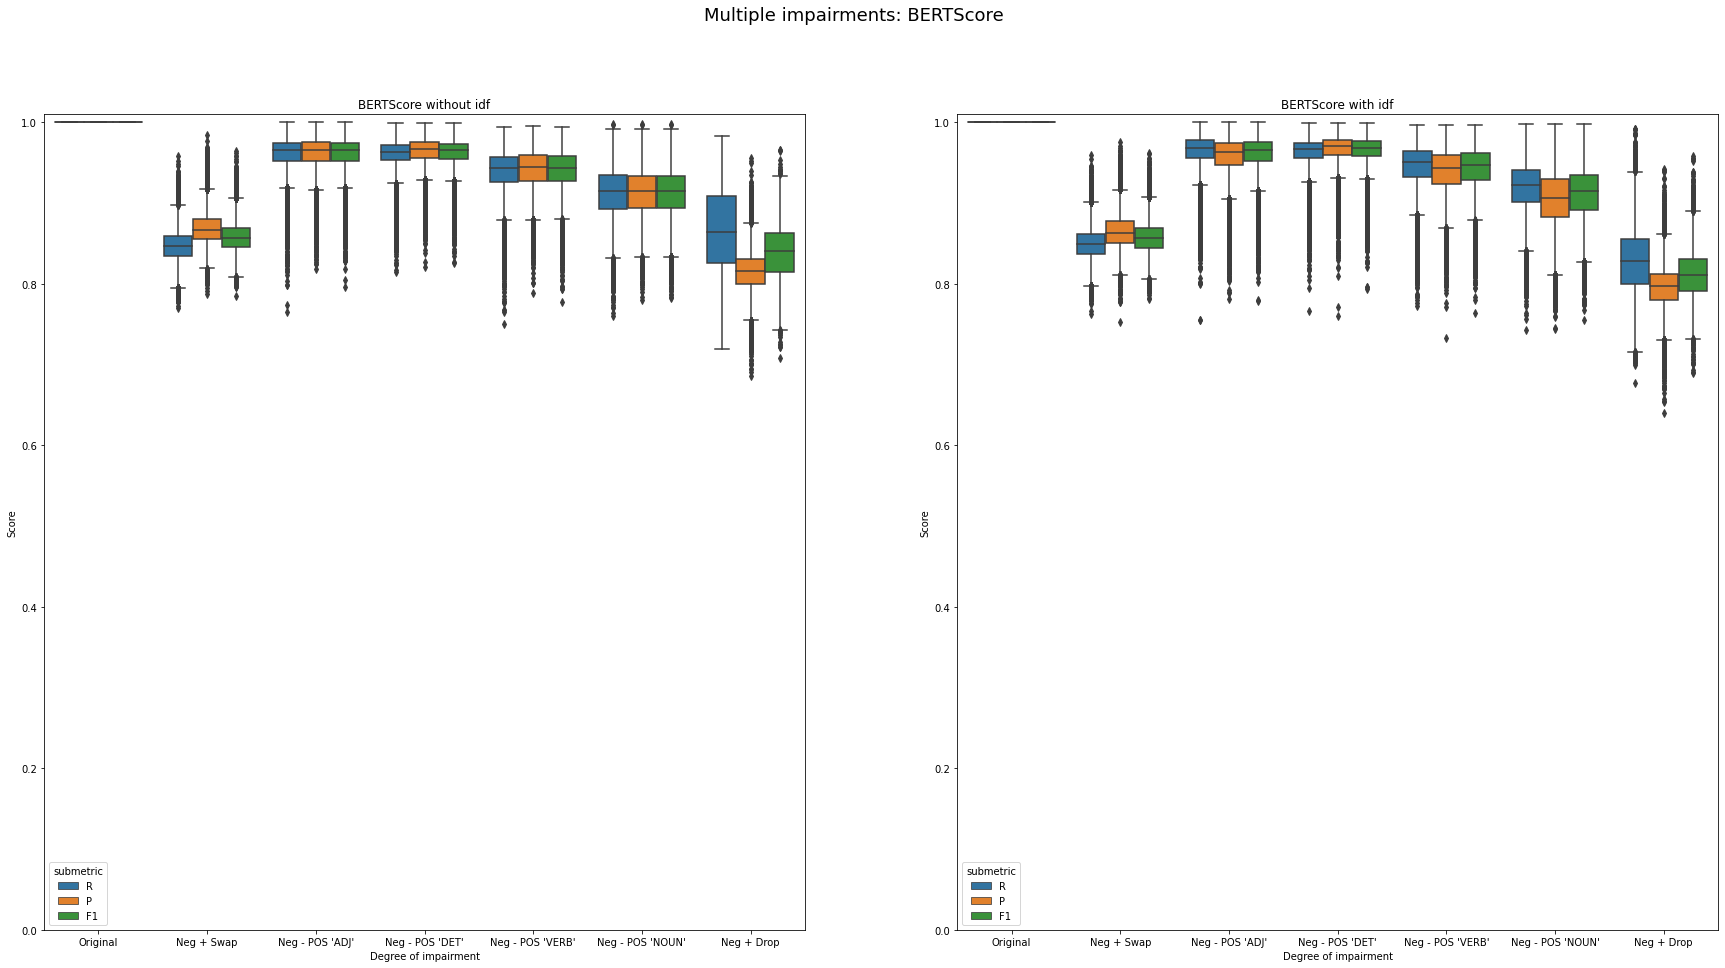

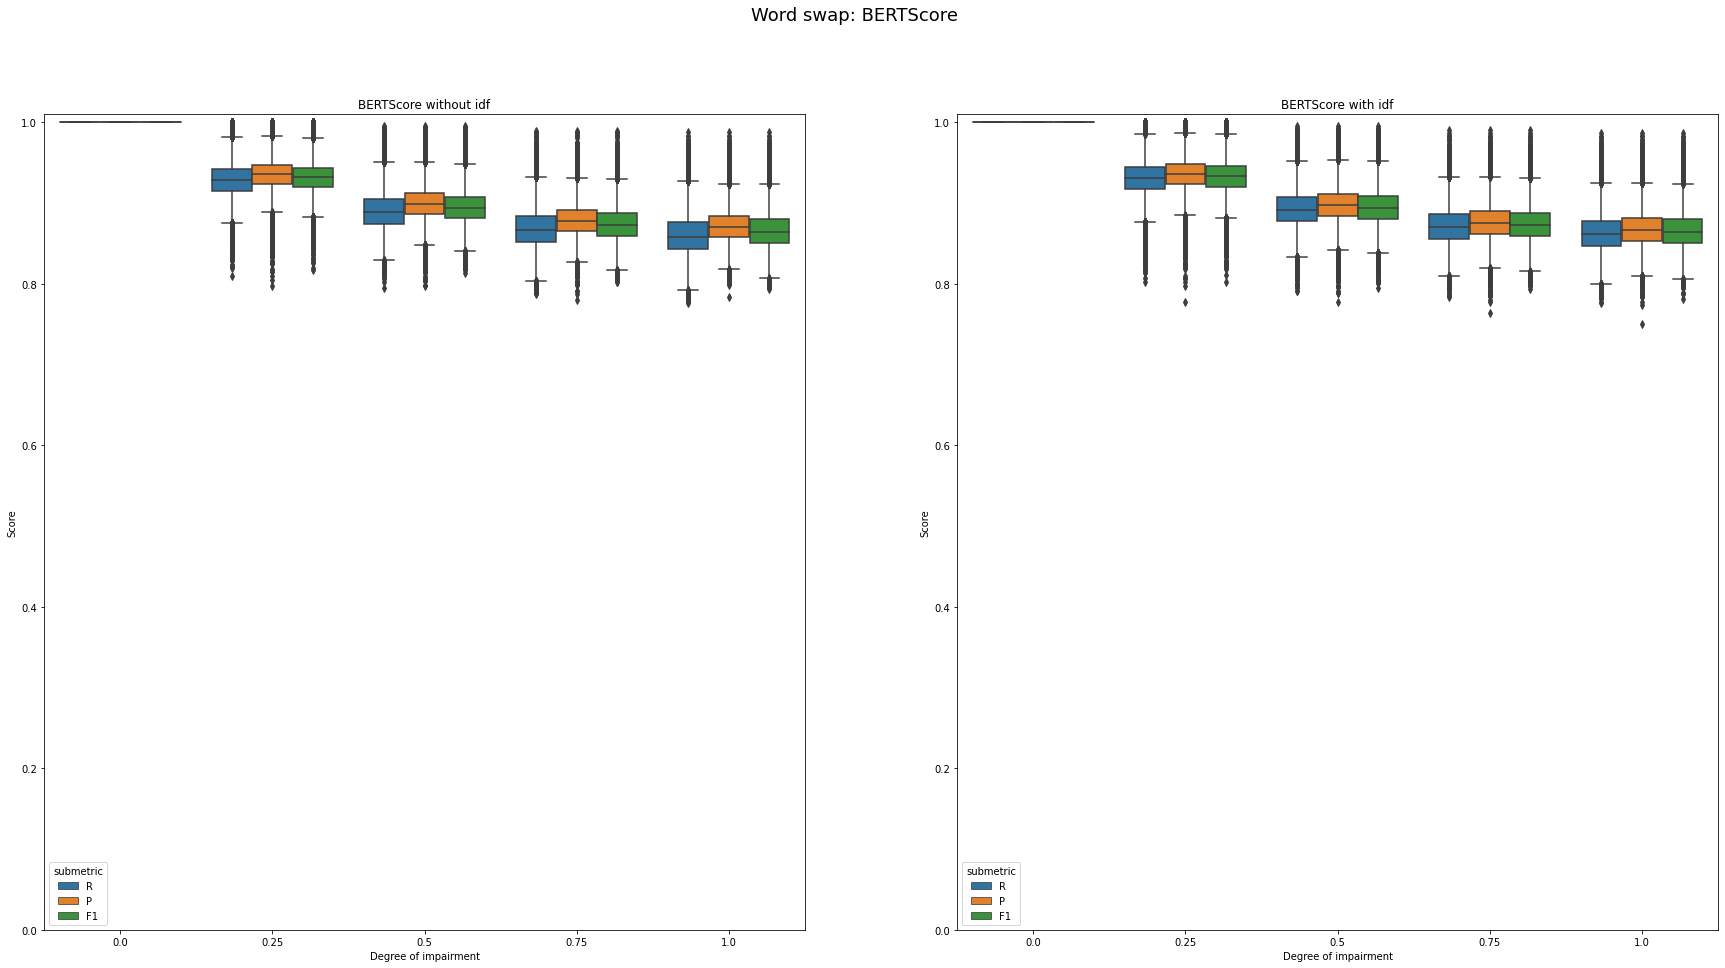

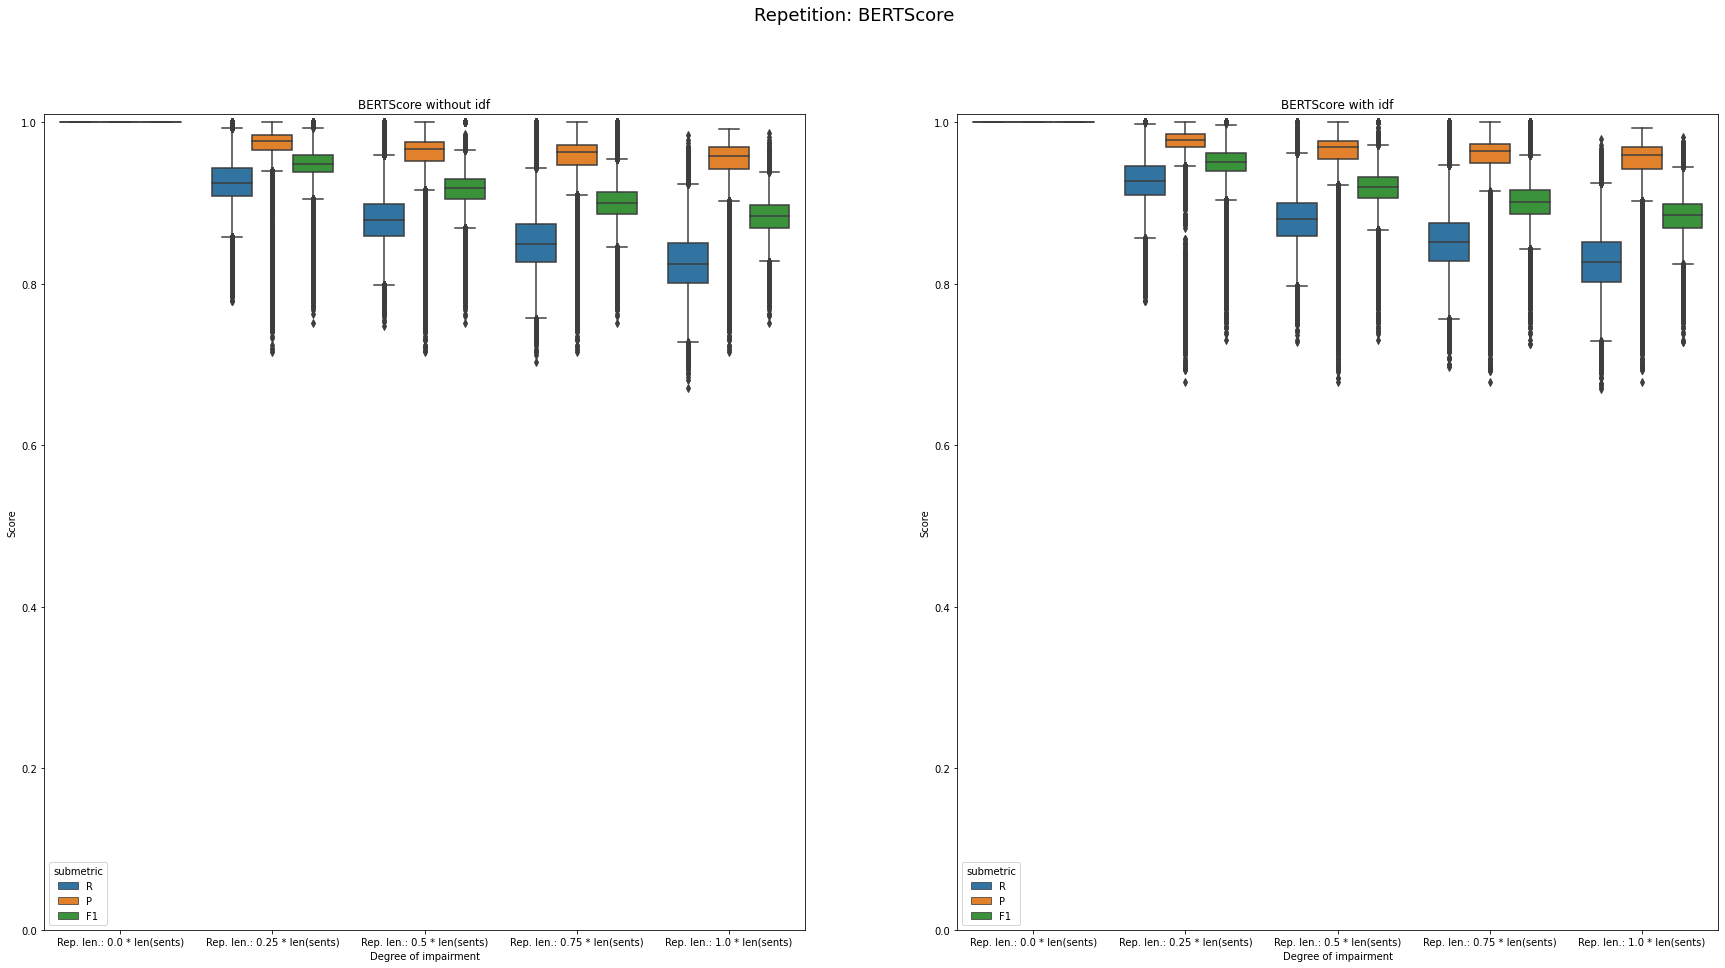

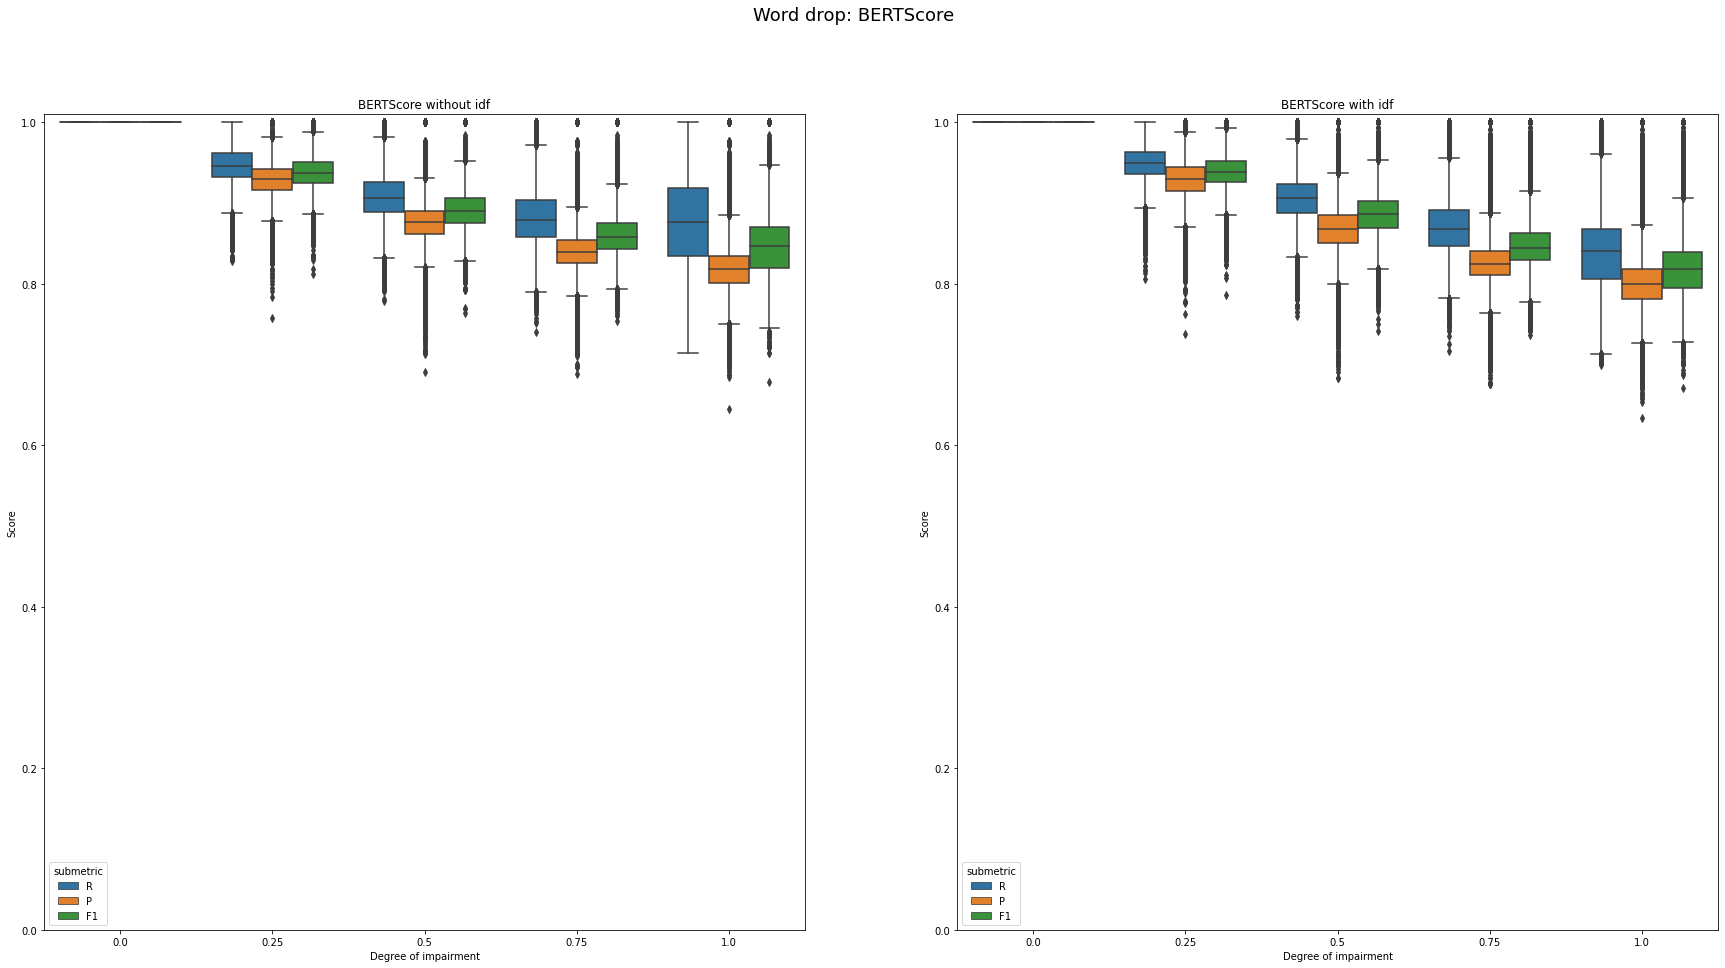

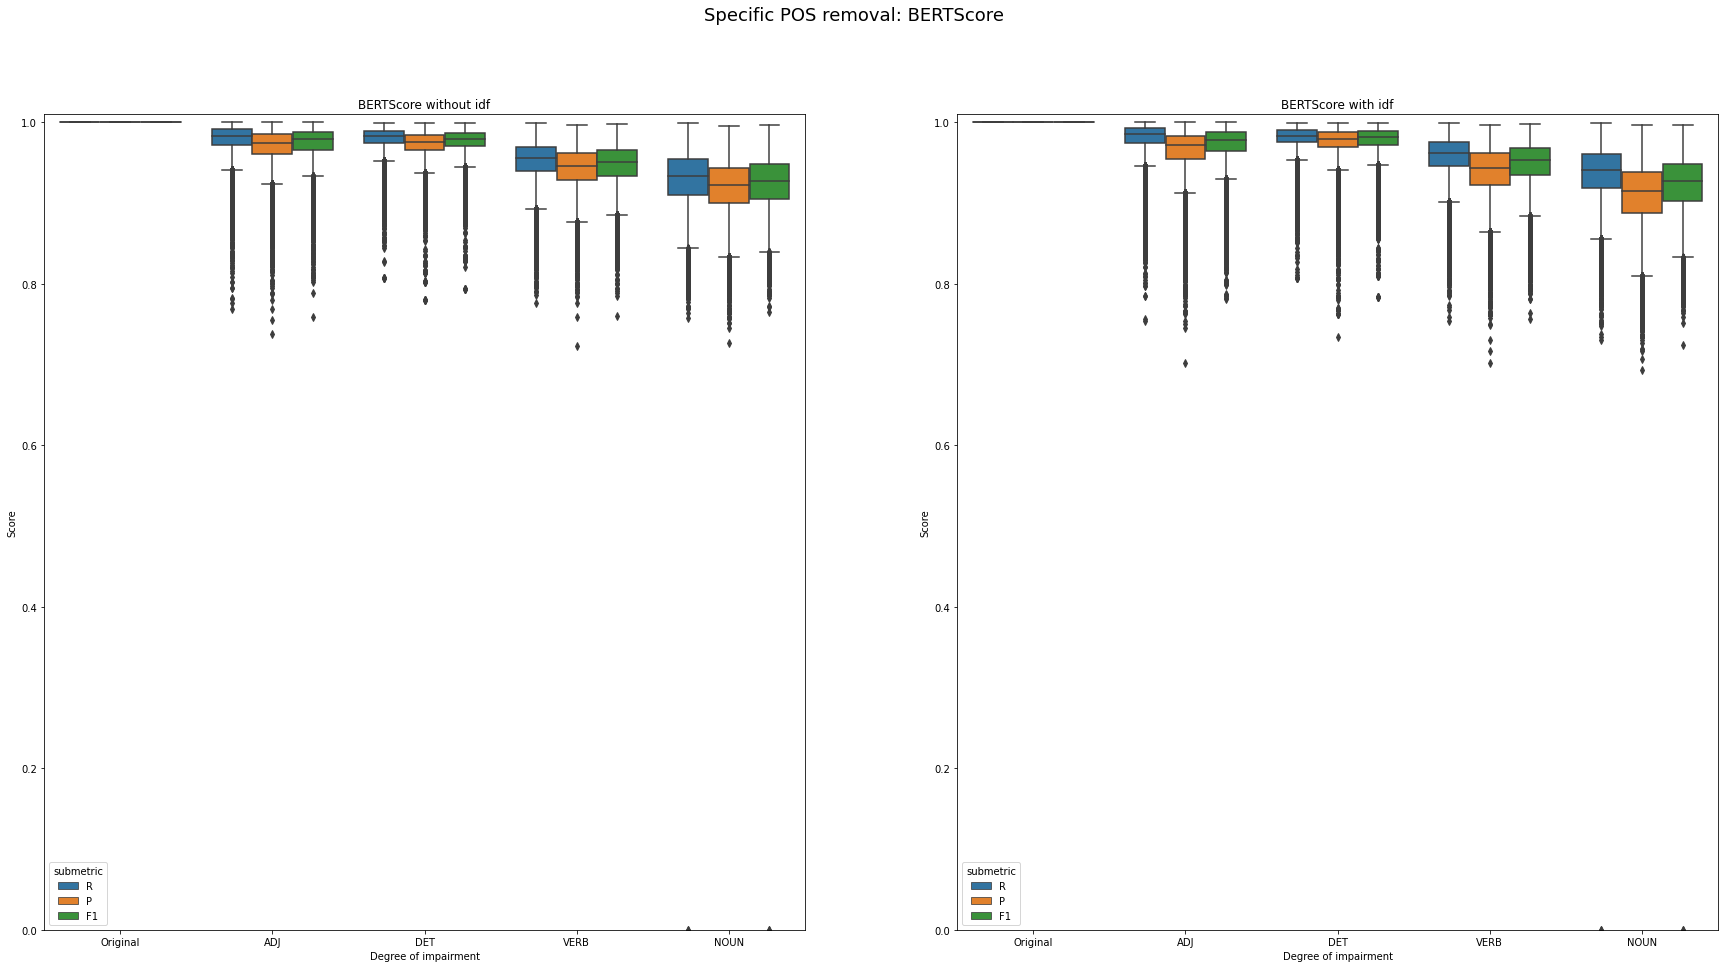

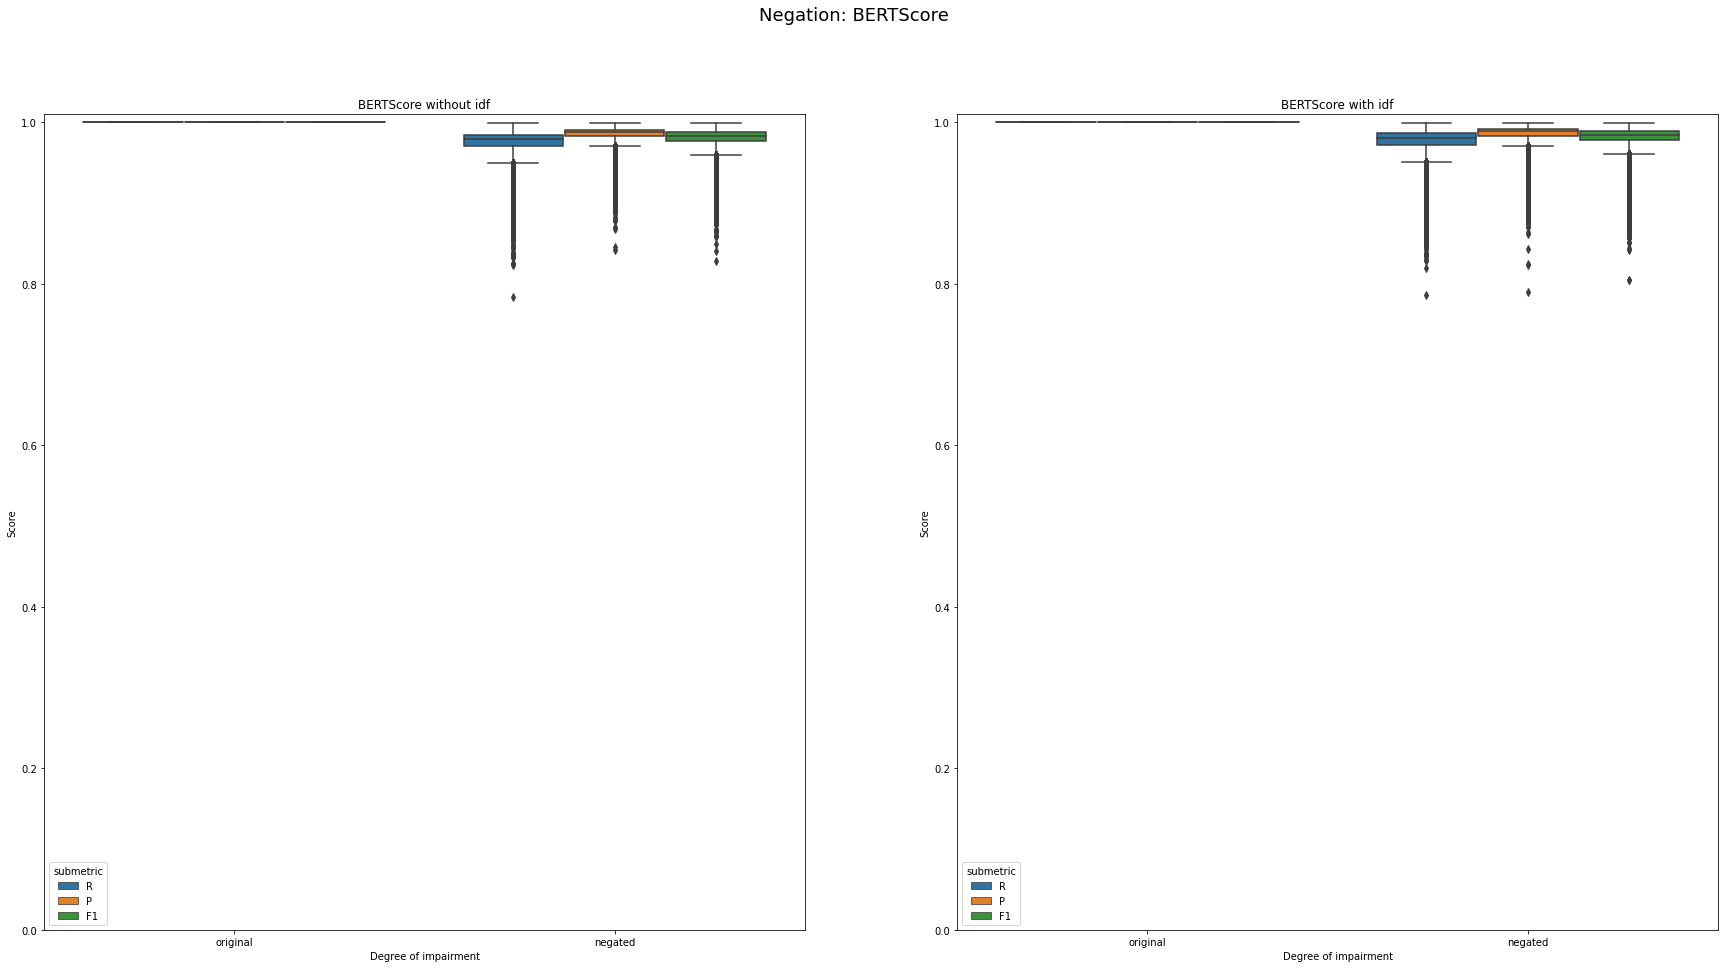

In [161]:

# Figures for BERTScore and BERTScore (idf)

for task, title in toVis:
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))#, subplot_kw={'aspect': 1})

    sns.boxplot(x='degree', y='value', hue='submetric', data=data[(data['metric']=='BERTScore') & (data['task'] == task)], ax=axes[0])
    sns.boxplot(x='degree', y='value', hue='submetric', data=data[(data['metric']=='BERTScore (idf)') & (data['task'] == task)], ax=axes[1])

    axes[0].set(ylim=(0, 1.01))
    axes[0].set_ylabel("Score")
    axes[0].set_xlabel("Degree of impairment", fontsize=10)
    axes[0].title.set_text('BERTScore without idf')

    axes[1].set(ylim=(0, 1.01))
    axes[1].set_ylabel("Score")
    axes[1].set_xlabel("Degree of impairment", fontsize=10)
    axes[1].title.set_text('BERTScore with idf')

    plt.suptitle(title + ": " + "BERTScore", fontsize=18)
    plt.savefig(os.path.join(figFolder, "BERTScore_" + task + "_fig.pdf"))

# Viz BLEURT-tiny and BLEURT-base

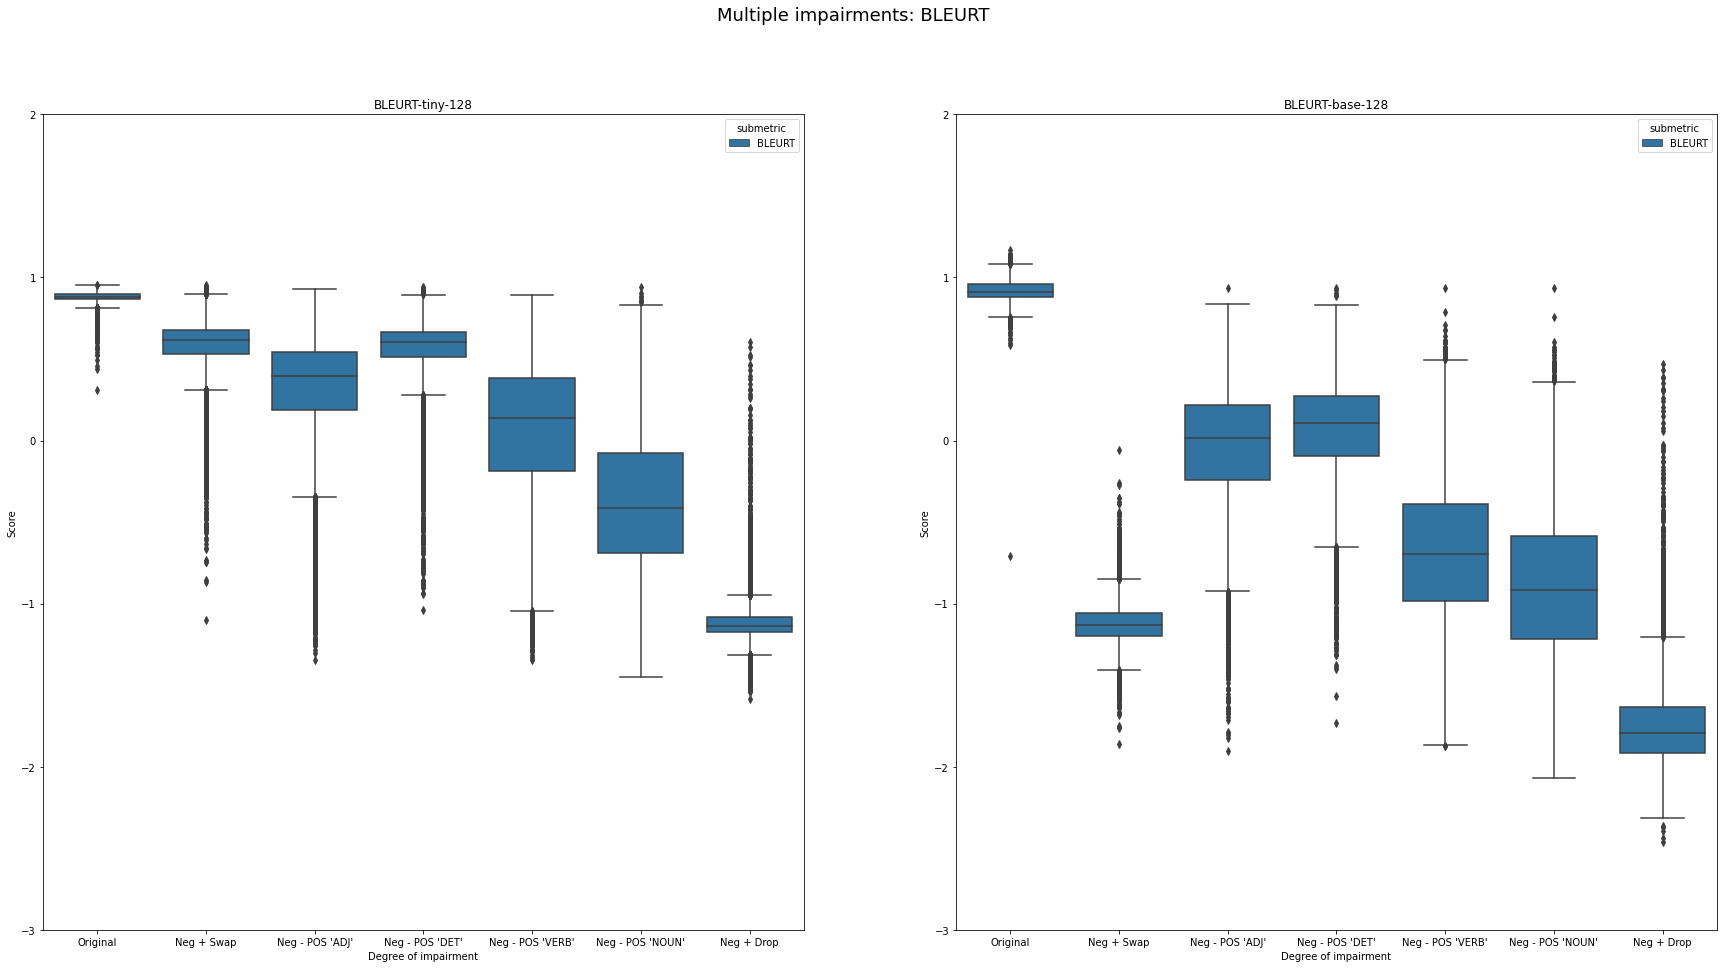

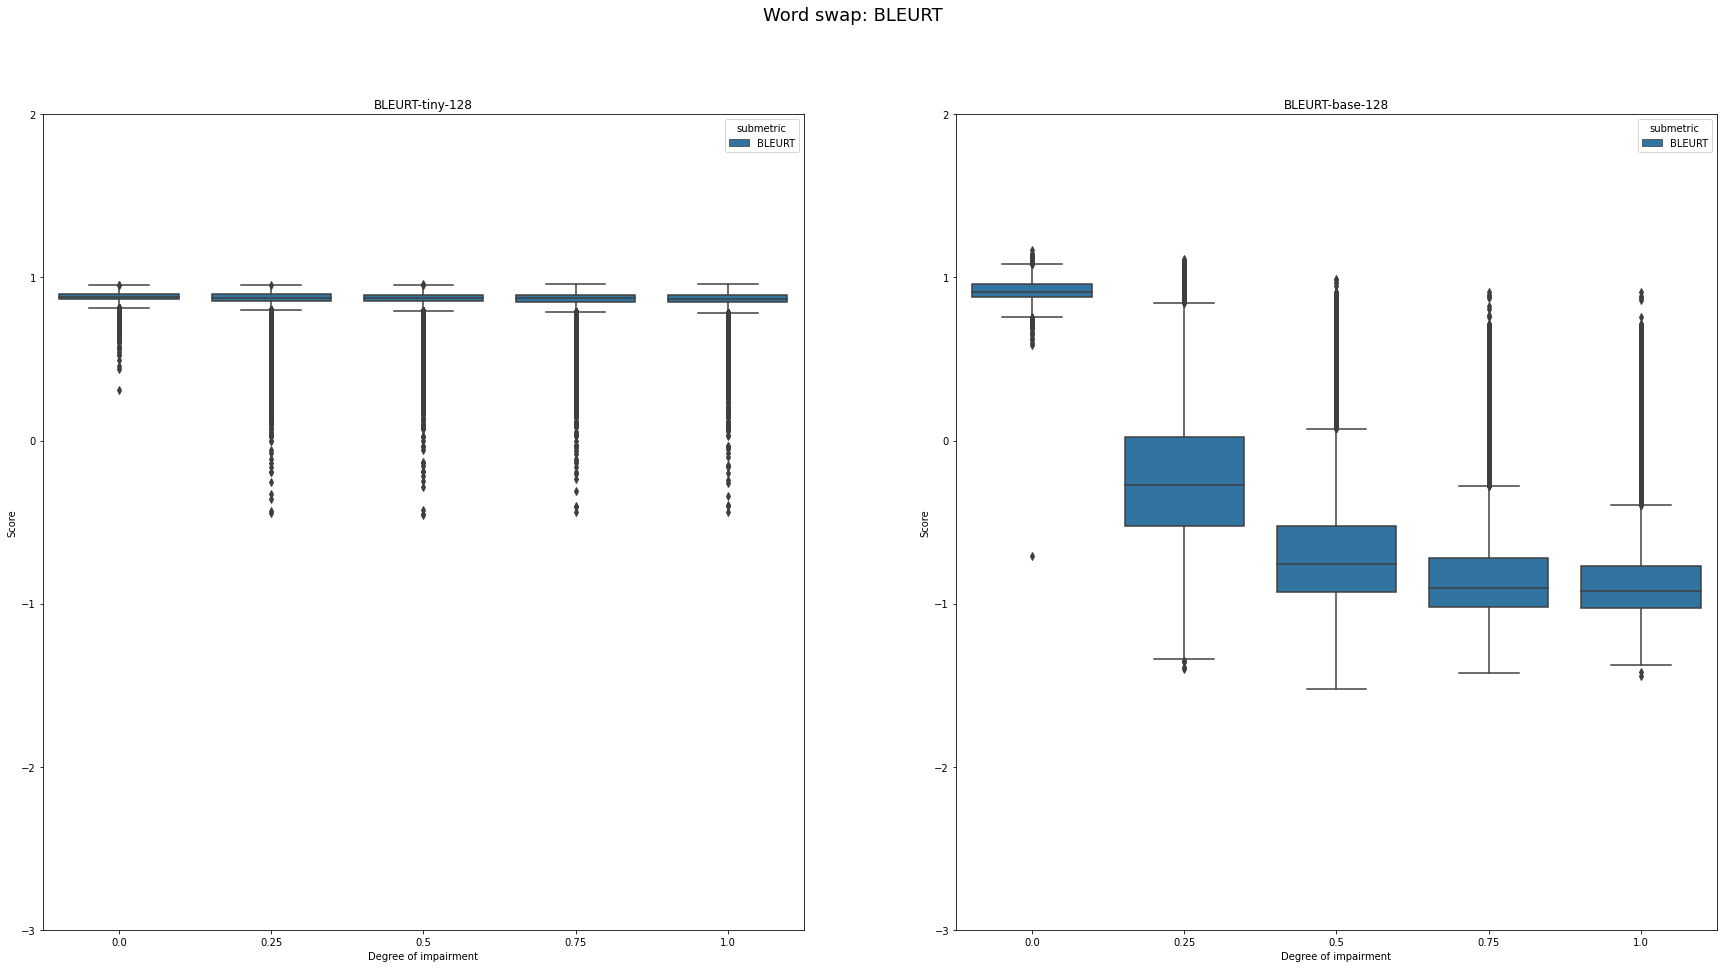

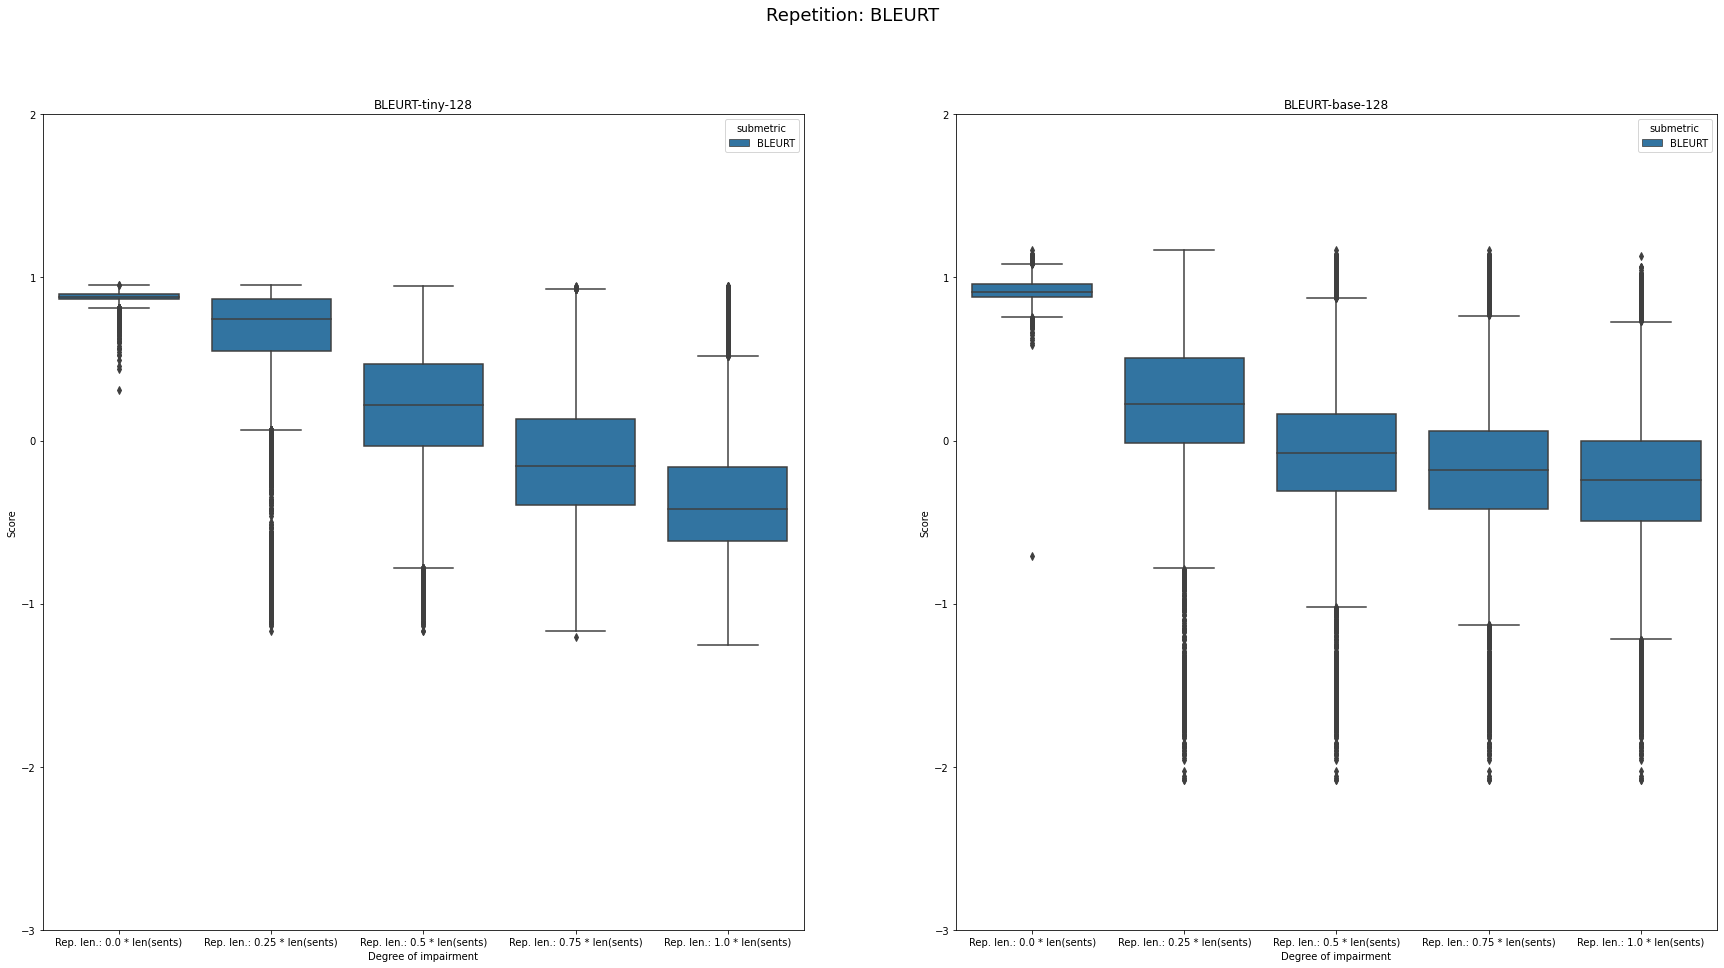

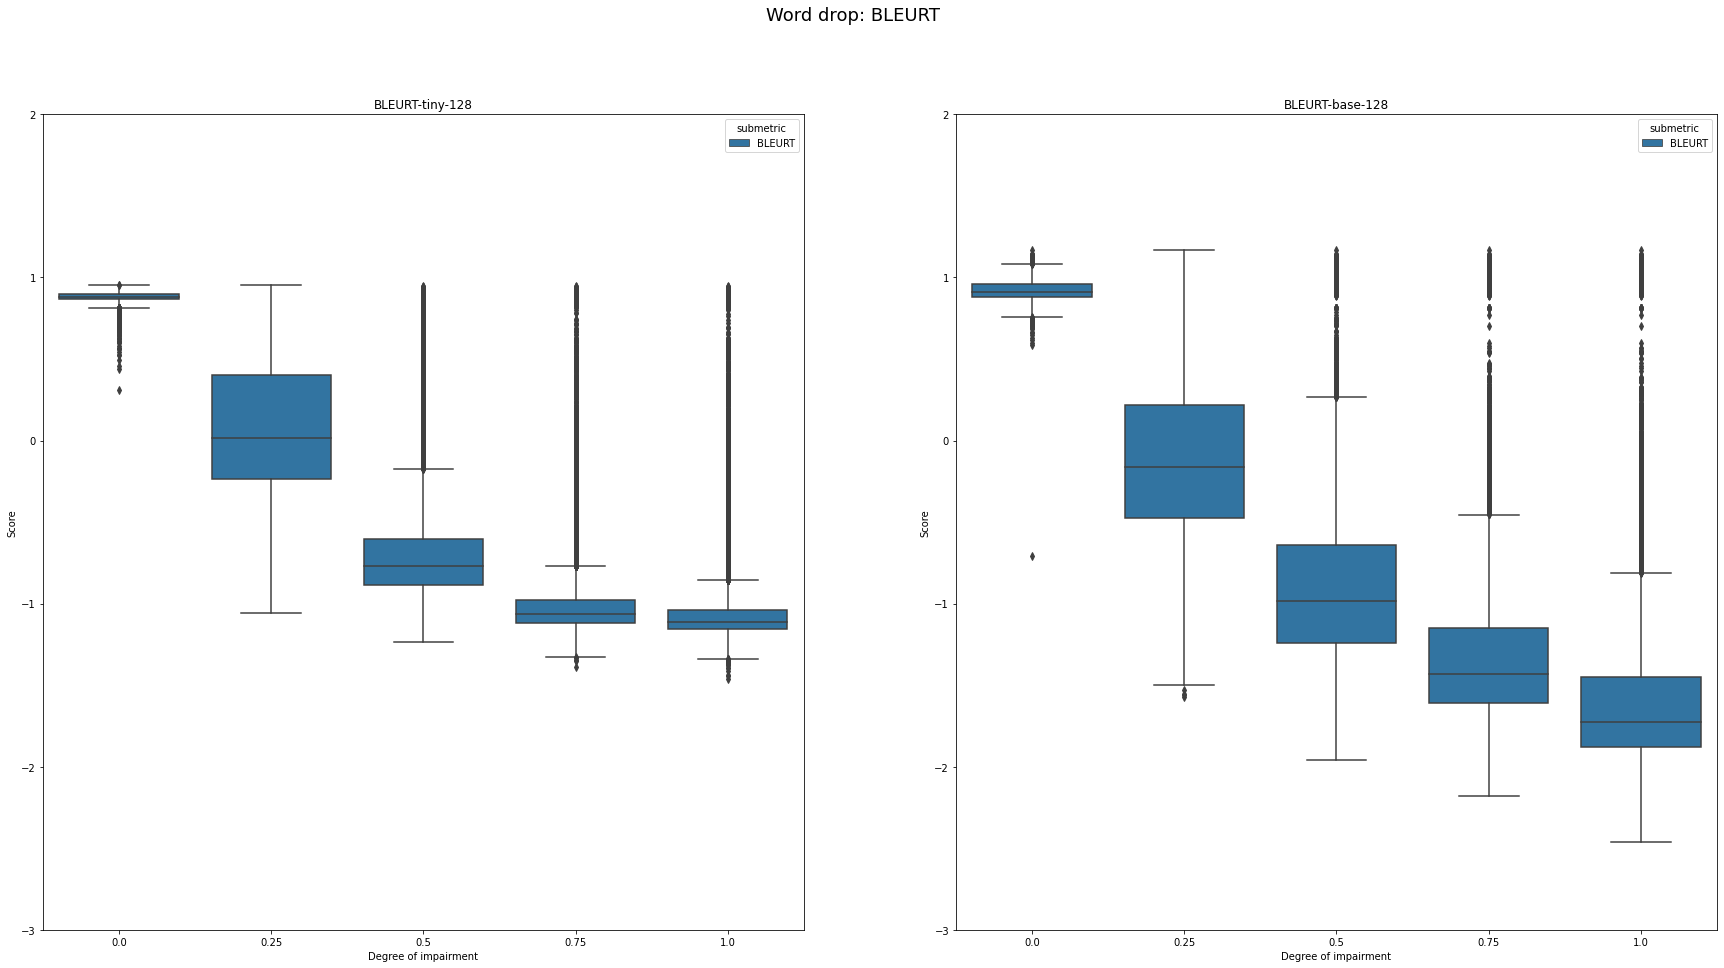

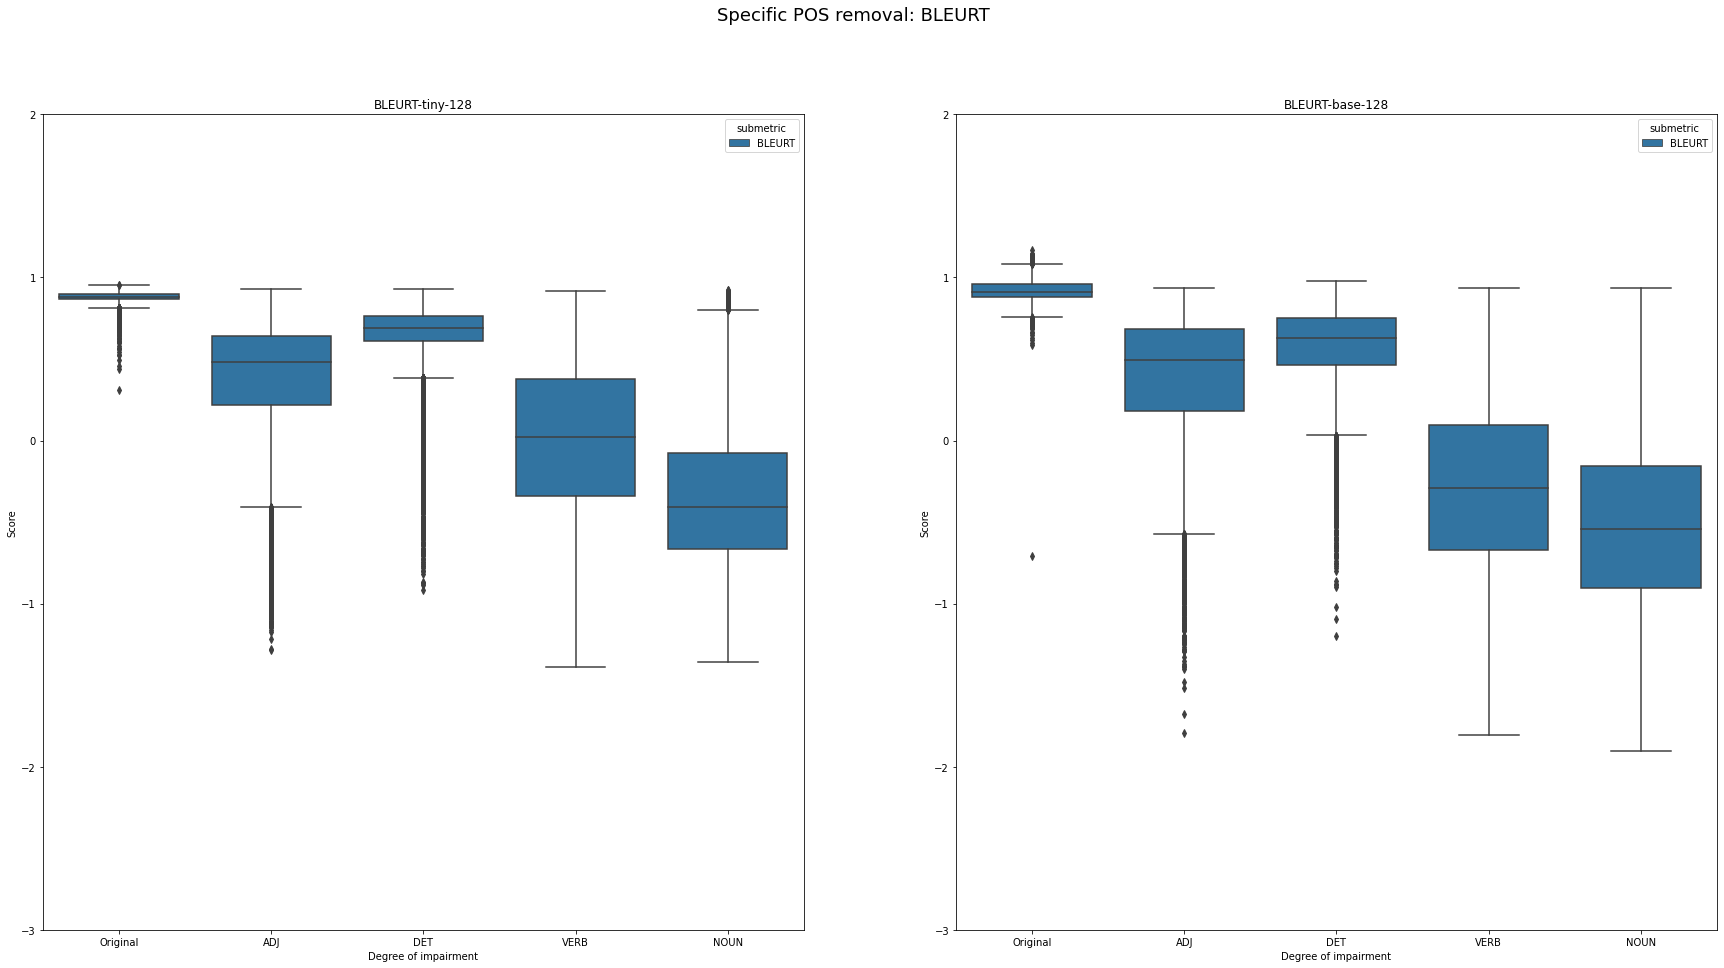

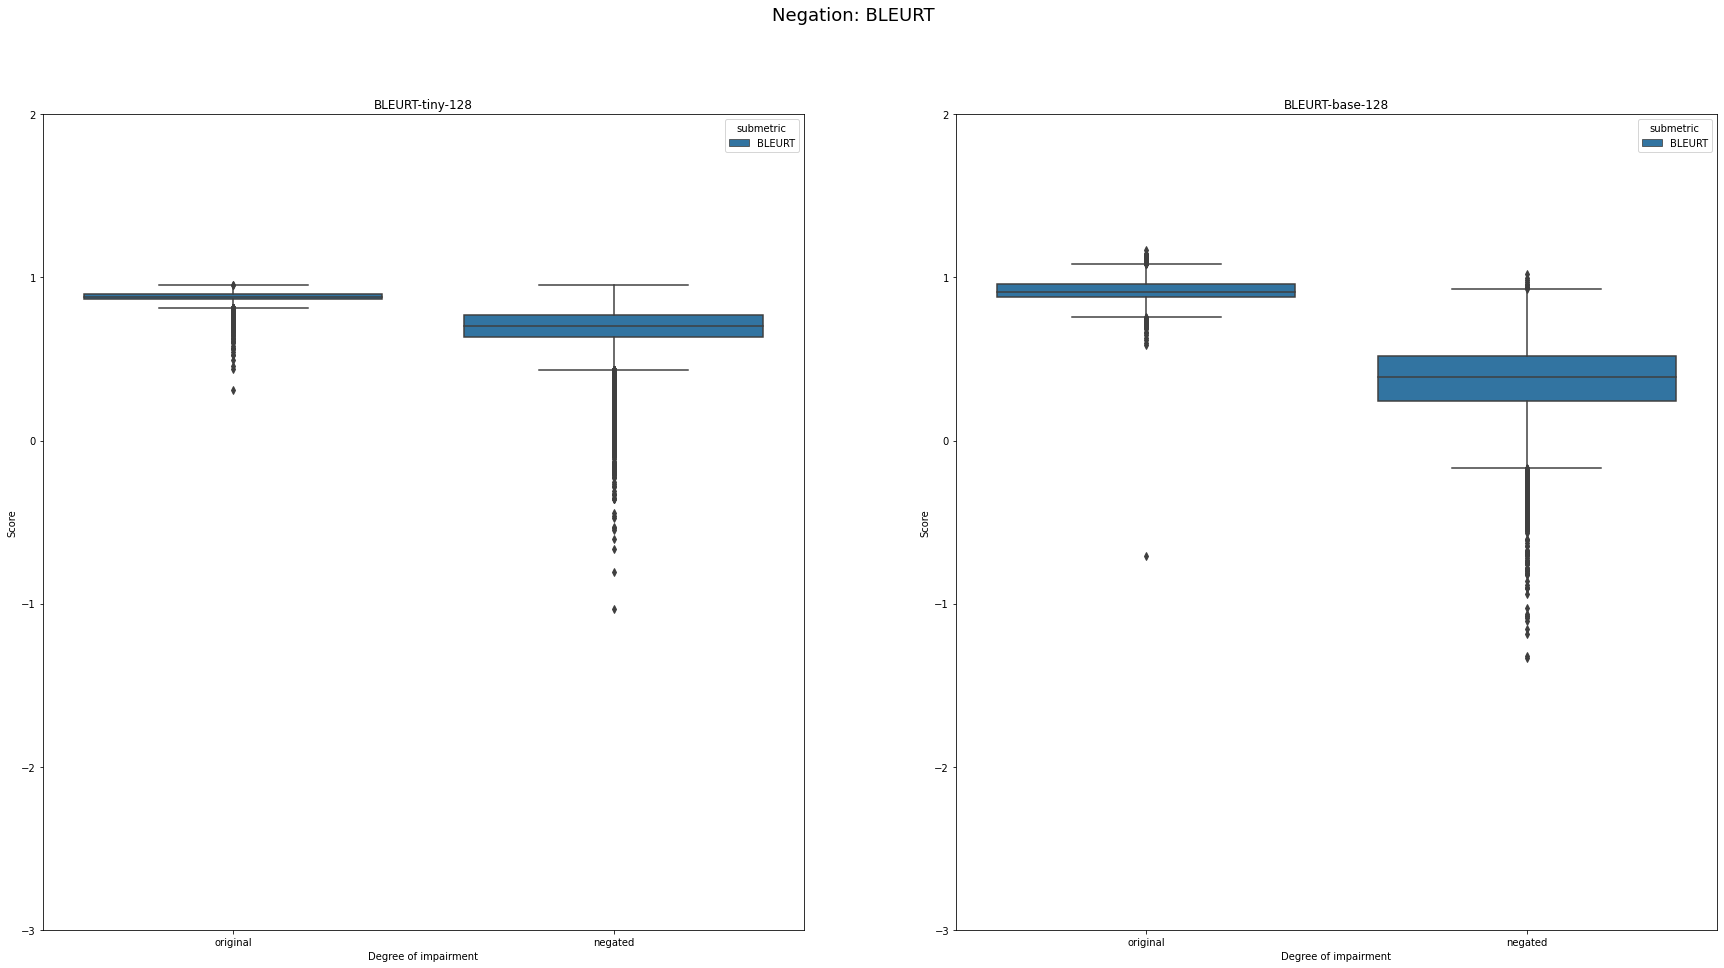

In [162]:
# Figures for BLEURT and BLEURT-base

for task, title in toVis:
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))#, subplot_kw={'aspect': 1})

    sns.boxplot(x='degree', y='value', hue='submetric', data=data[(data['metric']=='BLEURT') & (data['task'] == task)], ax=axes[0])
    sns.boxplot(x='degree', y='value', hue='submetric', data=data[(data['metric']=='BLEURT-Base-128') & (data['task'] == task)], ax=axes[1])

    axes[0].set(ylim=(-3, 2))
    axes[0].set_ylabel("Score")
    axes[0].set_xlabel("Degree of impairment", fontsize=10)
    axes[0].title.set_text('BLEURT-tiny-128')

    axes[1].set(ylim=(-3, 2))
    axes[1].set_ylabel("Score")
    axes[1].set_xlabel("Degree of impairment", fontsize=10)
    axes[1].title.set_text('BLEURT-base-128')

    plt.suptitle(title + ": " + "BLEURT", fontsize=18)
    plt.savefig(os.path.join(figFolder, "BLEURT_" + task + "_fig.pdf"))

# Viz ME-Petersen, ME-CAPTURE, ME-Schnabel

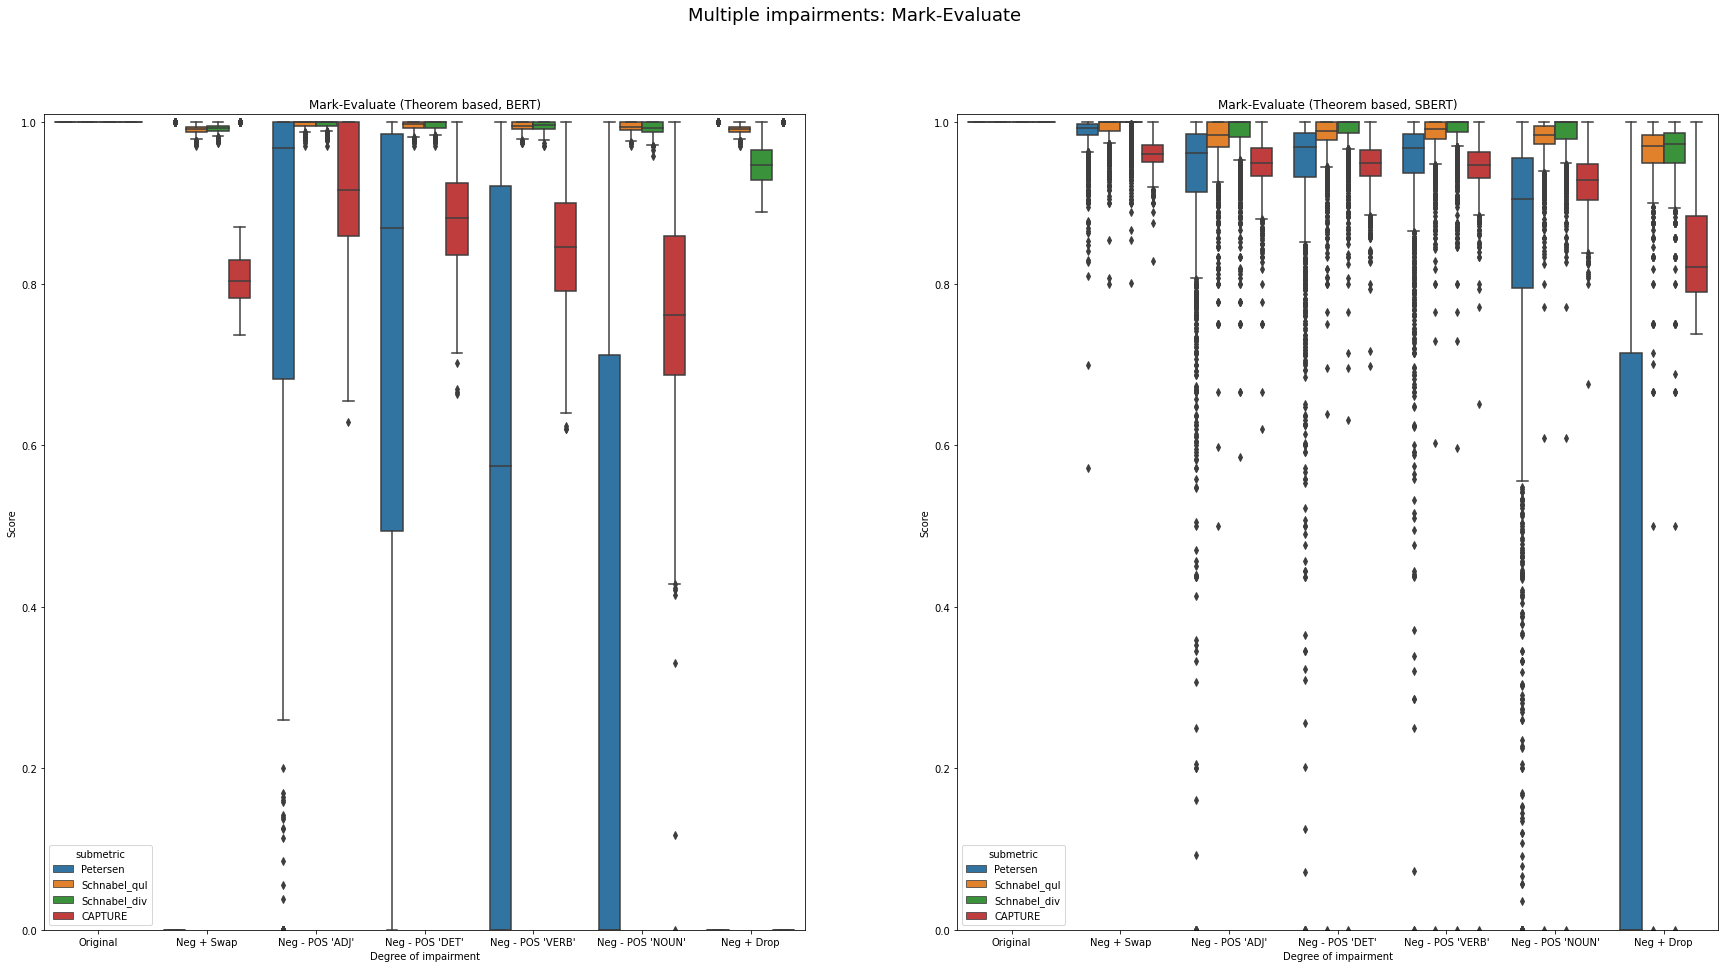

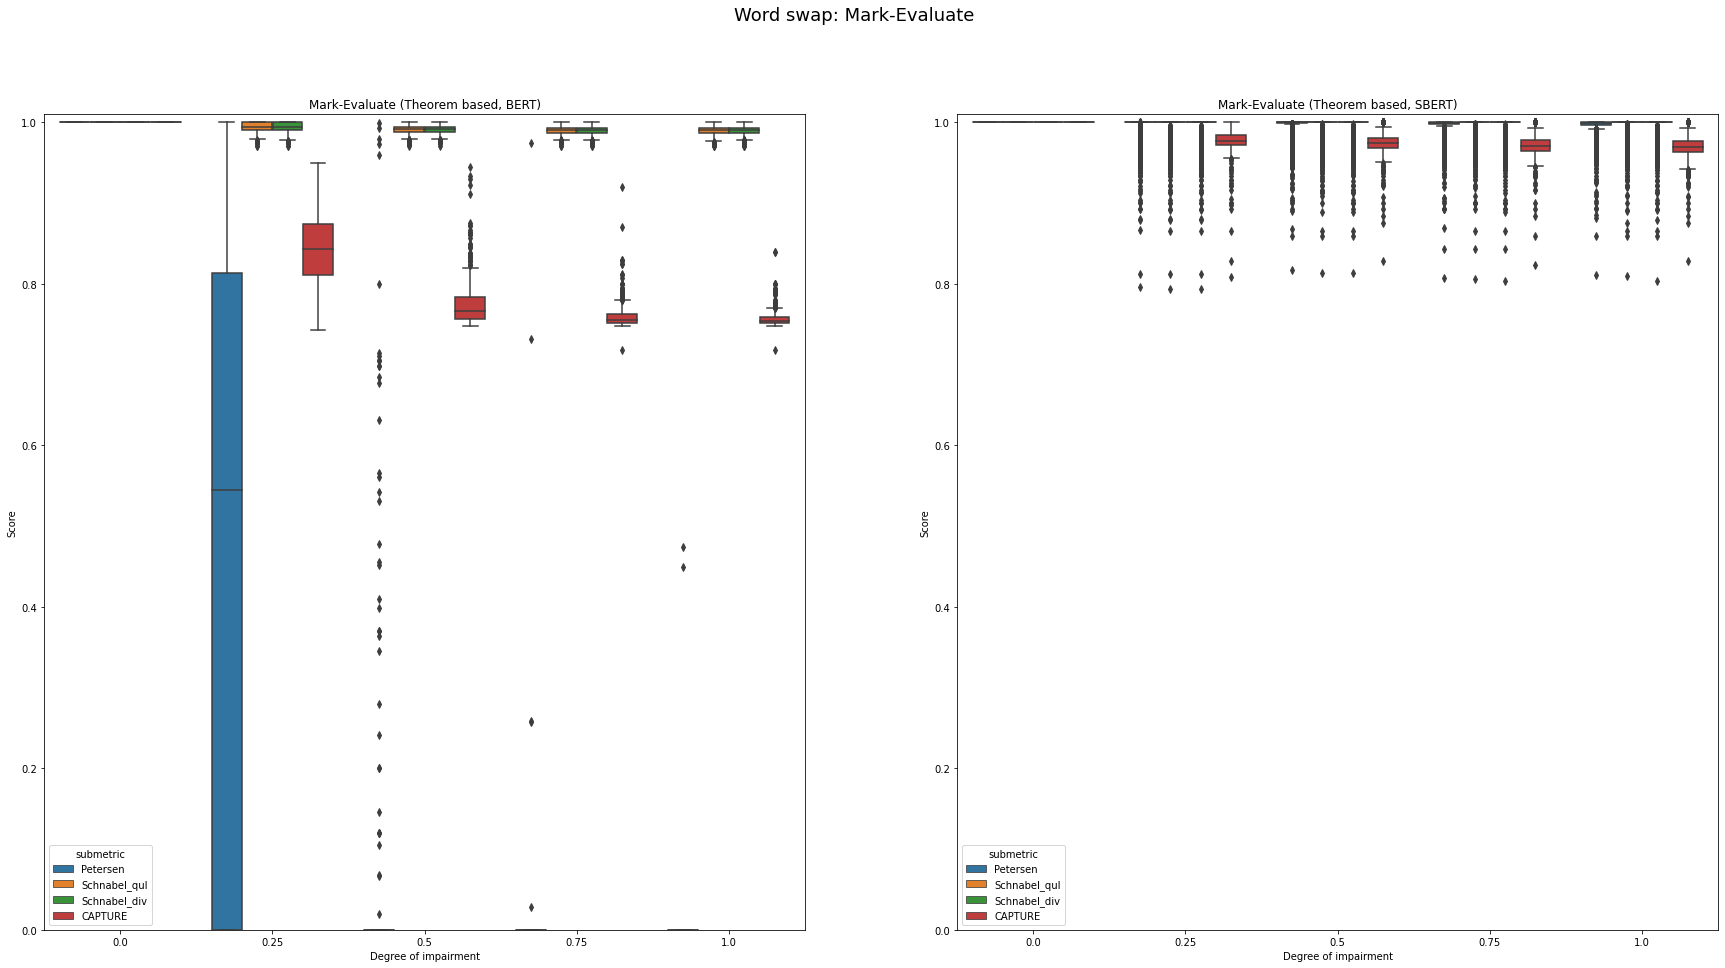

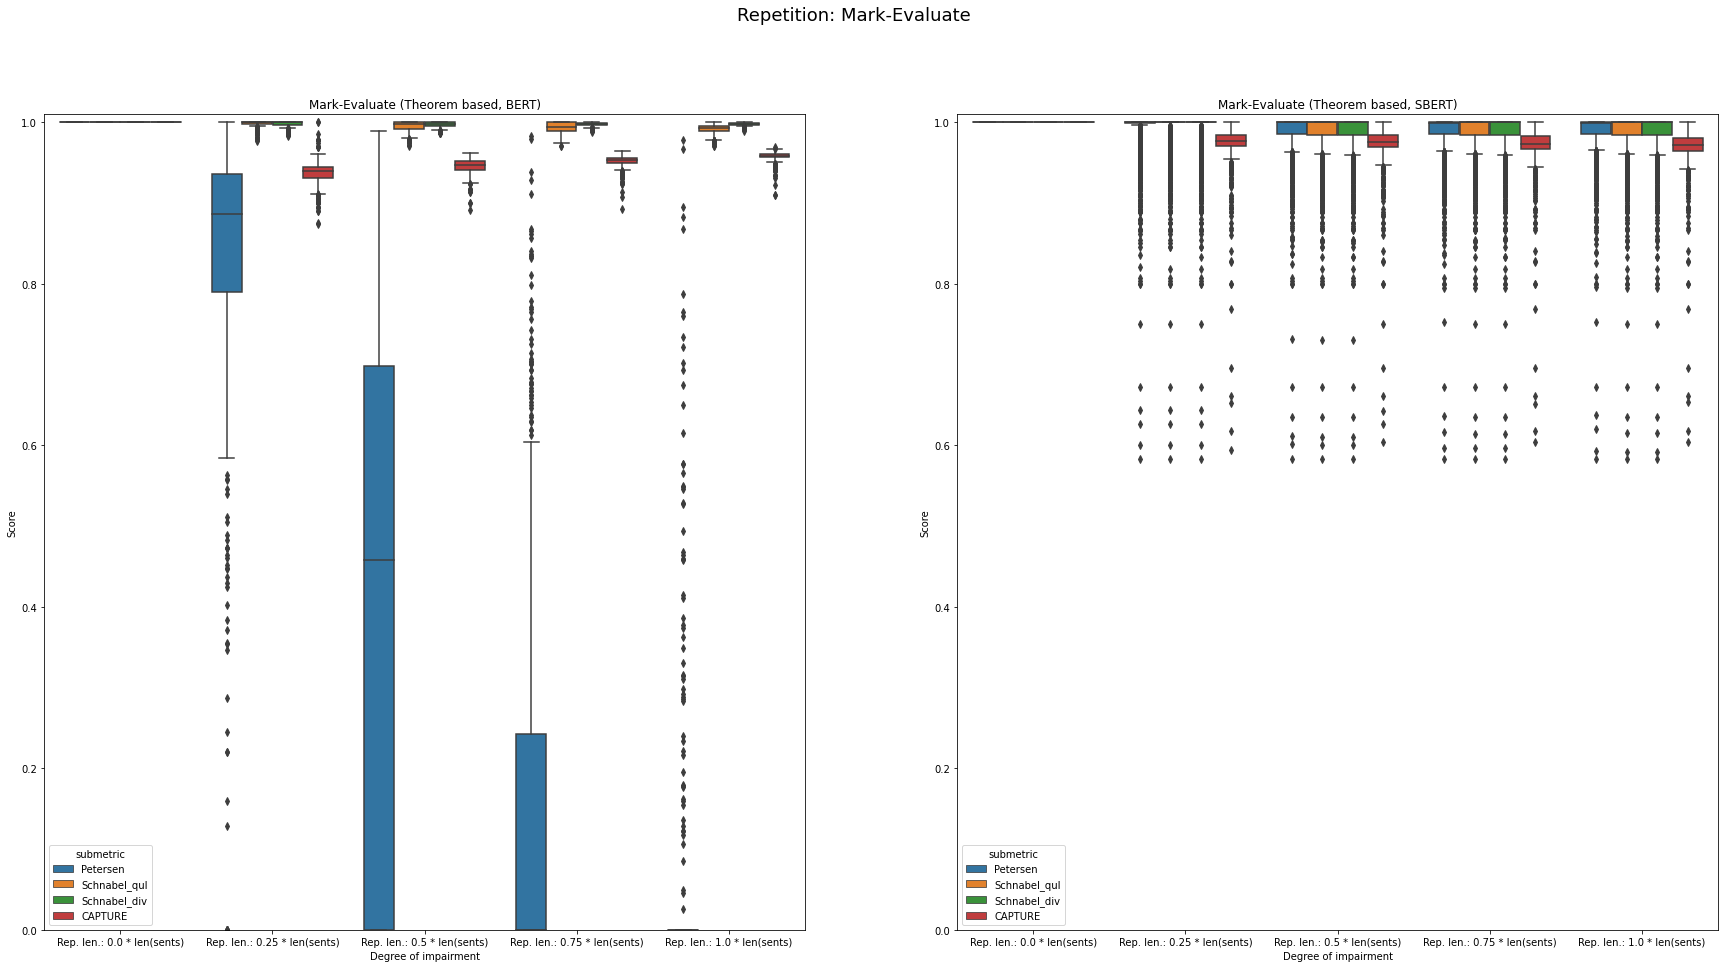

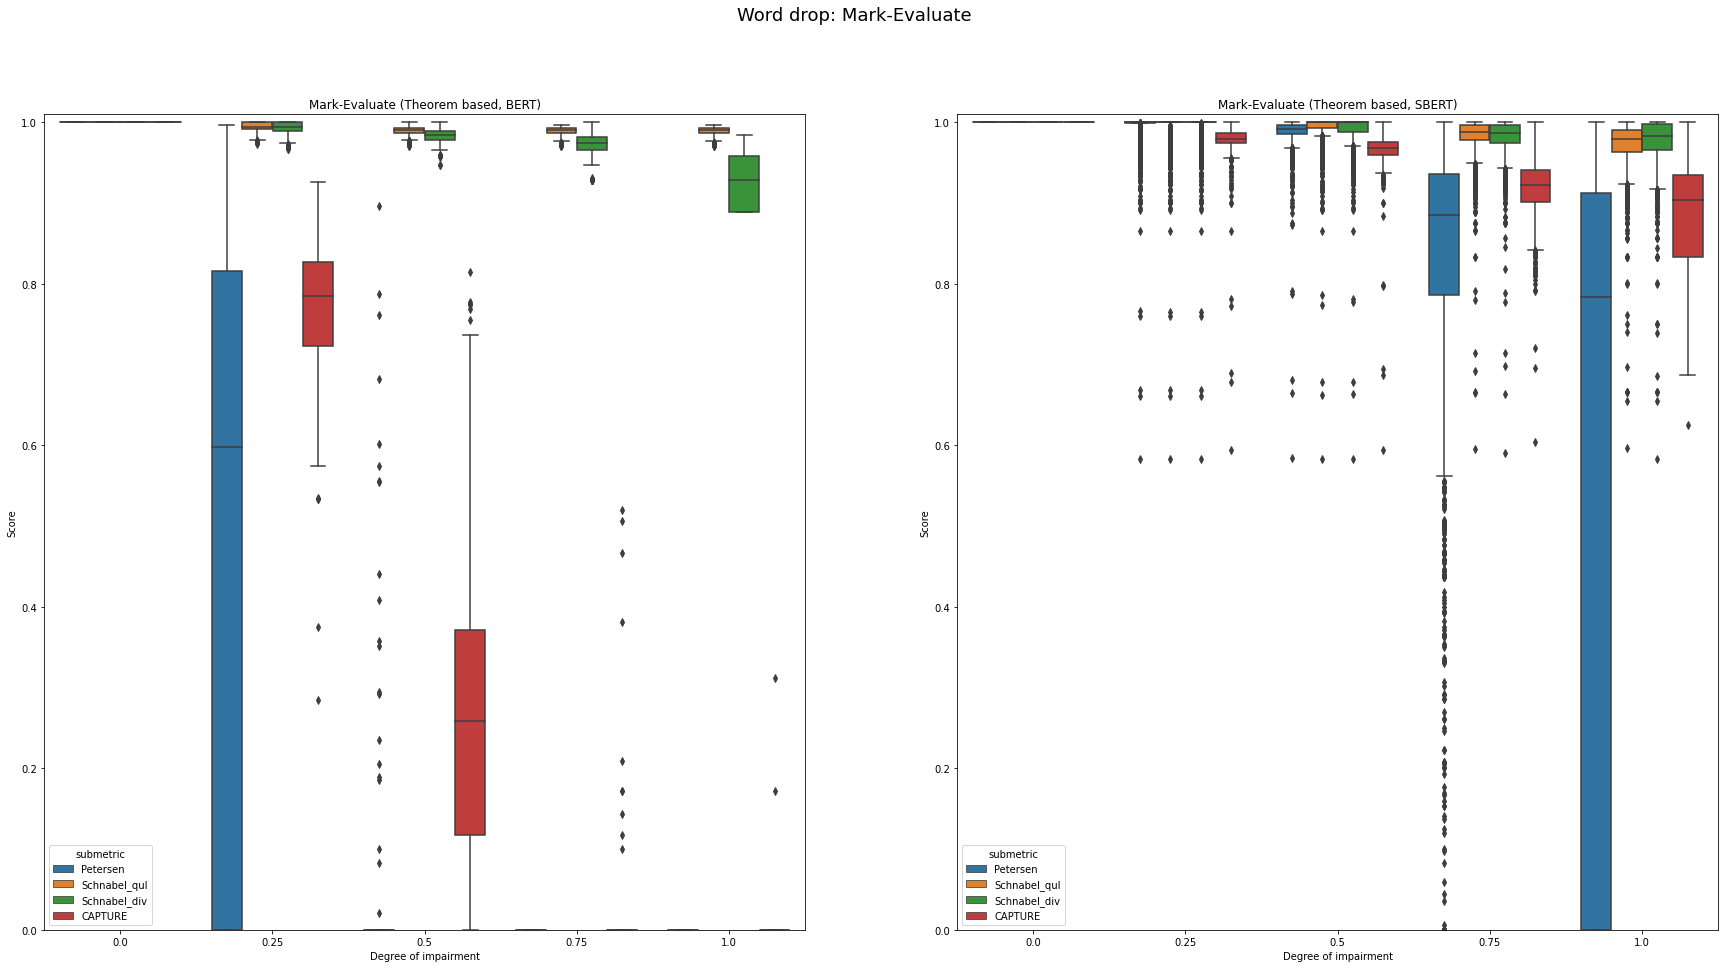

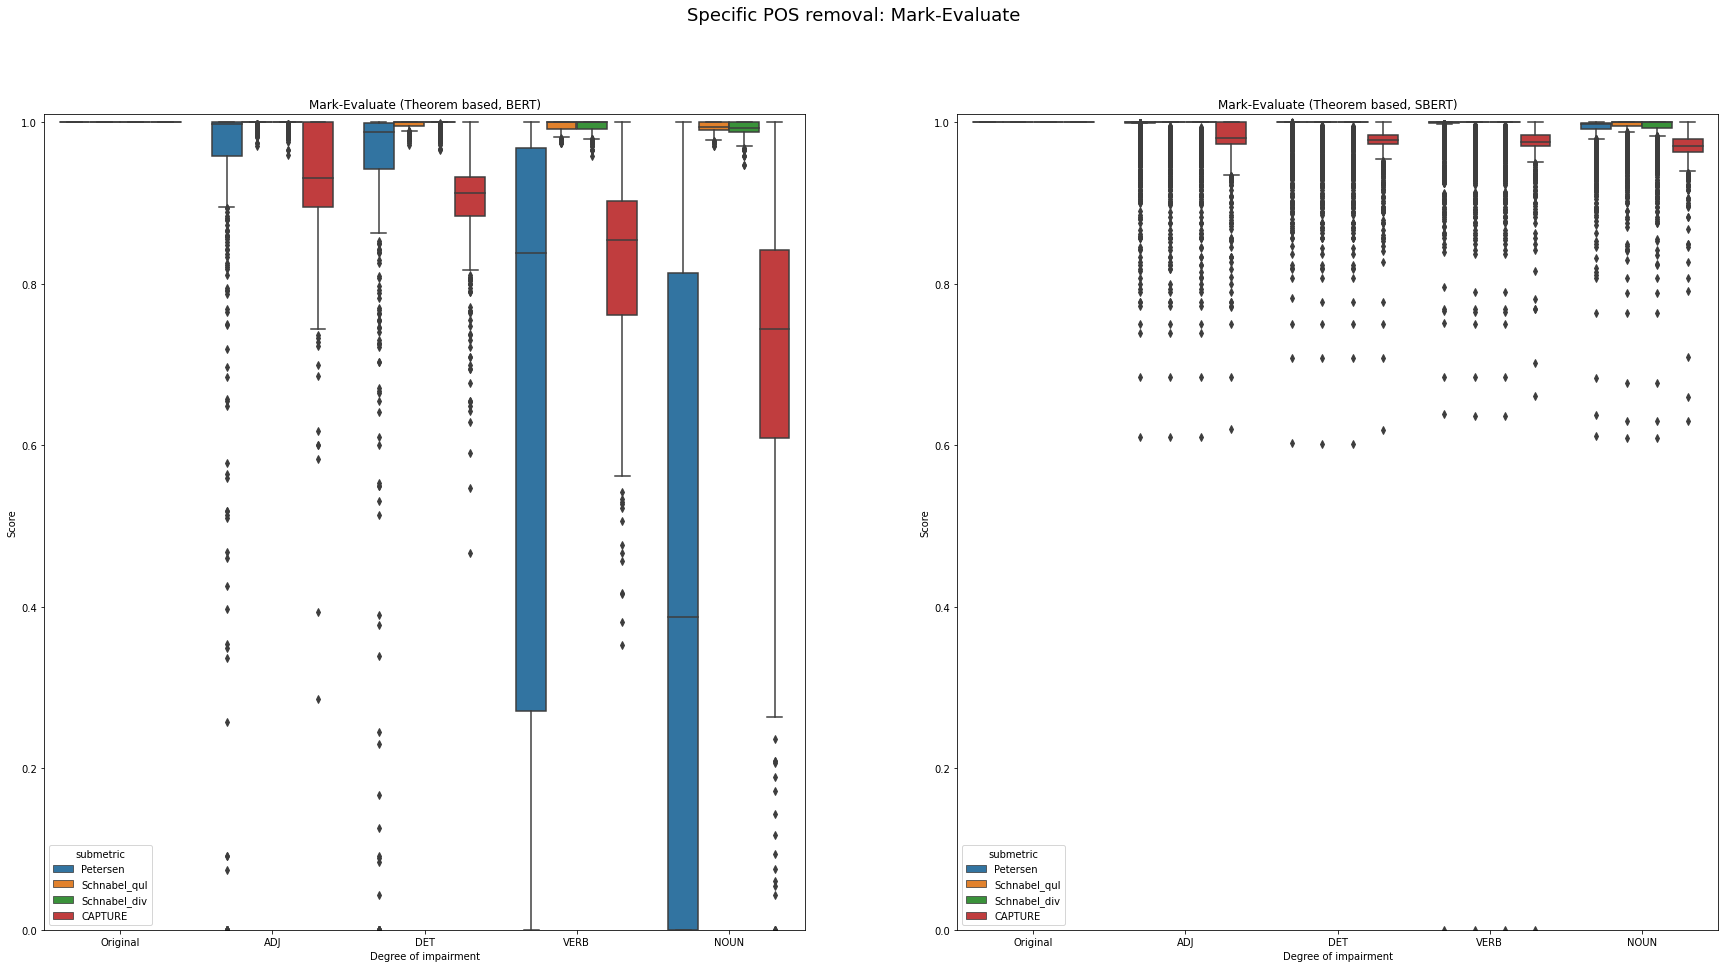

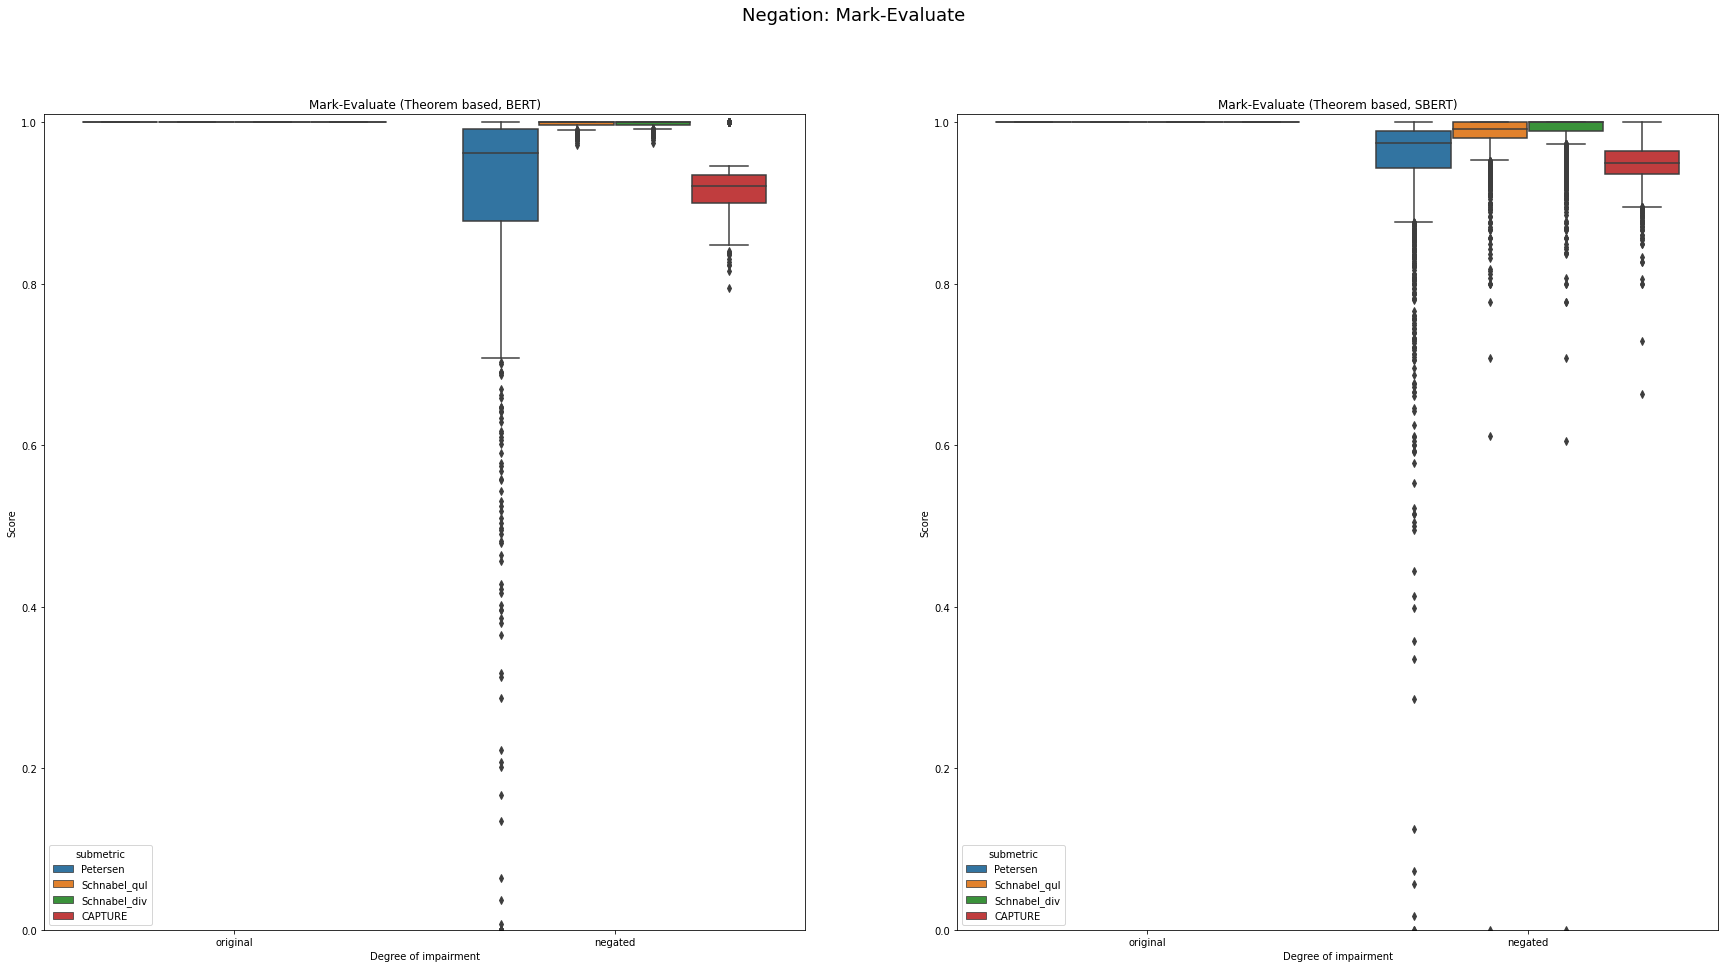

In [163]:
for task, title in toVis:
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))#, subplot_kw={'aspect': 1})

    sns.boxplot(x='degree', y='value', hue='submetric', data=data[(data['metric']=='Mark-Evaluate (Theorem based, BERT)') & (data['task'] == task)], ax=axes[0])
    sns.boxplot(x='degree', y='value', hue='submetric', data=data[(data['metric']=='Mark-Evaluate (Theorem based, SBERT)') & (data['task'] == task)], ax=axes[1])

    axes[0].set(ylim=(0, 1.01))
    axes[0].set_ylabel("Score")
    axes[0].set_xlabel("Degree of impairment", fontsize=10)
    axes[0].title.set_text('Mark-Evaluate (Theorem based, BERT)')

    axes[1].set(ylim=(0, 1.01))
    axes[1].set_ylabel("Score")
    axes[1].set_xlabel("Degree of impairment", fontsize=10)
    axes[1].title.set_text('Mark-Evaluate (Theorem based, SBERT)')

    plt.suptitle(title + ": " + "Mark-Evaluate", fontsize=18)
    plt.savefig(os.path.join(figFolder, "ME_" + task + "_fig.pdf"))

# Viz BLEU

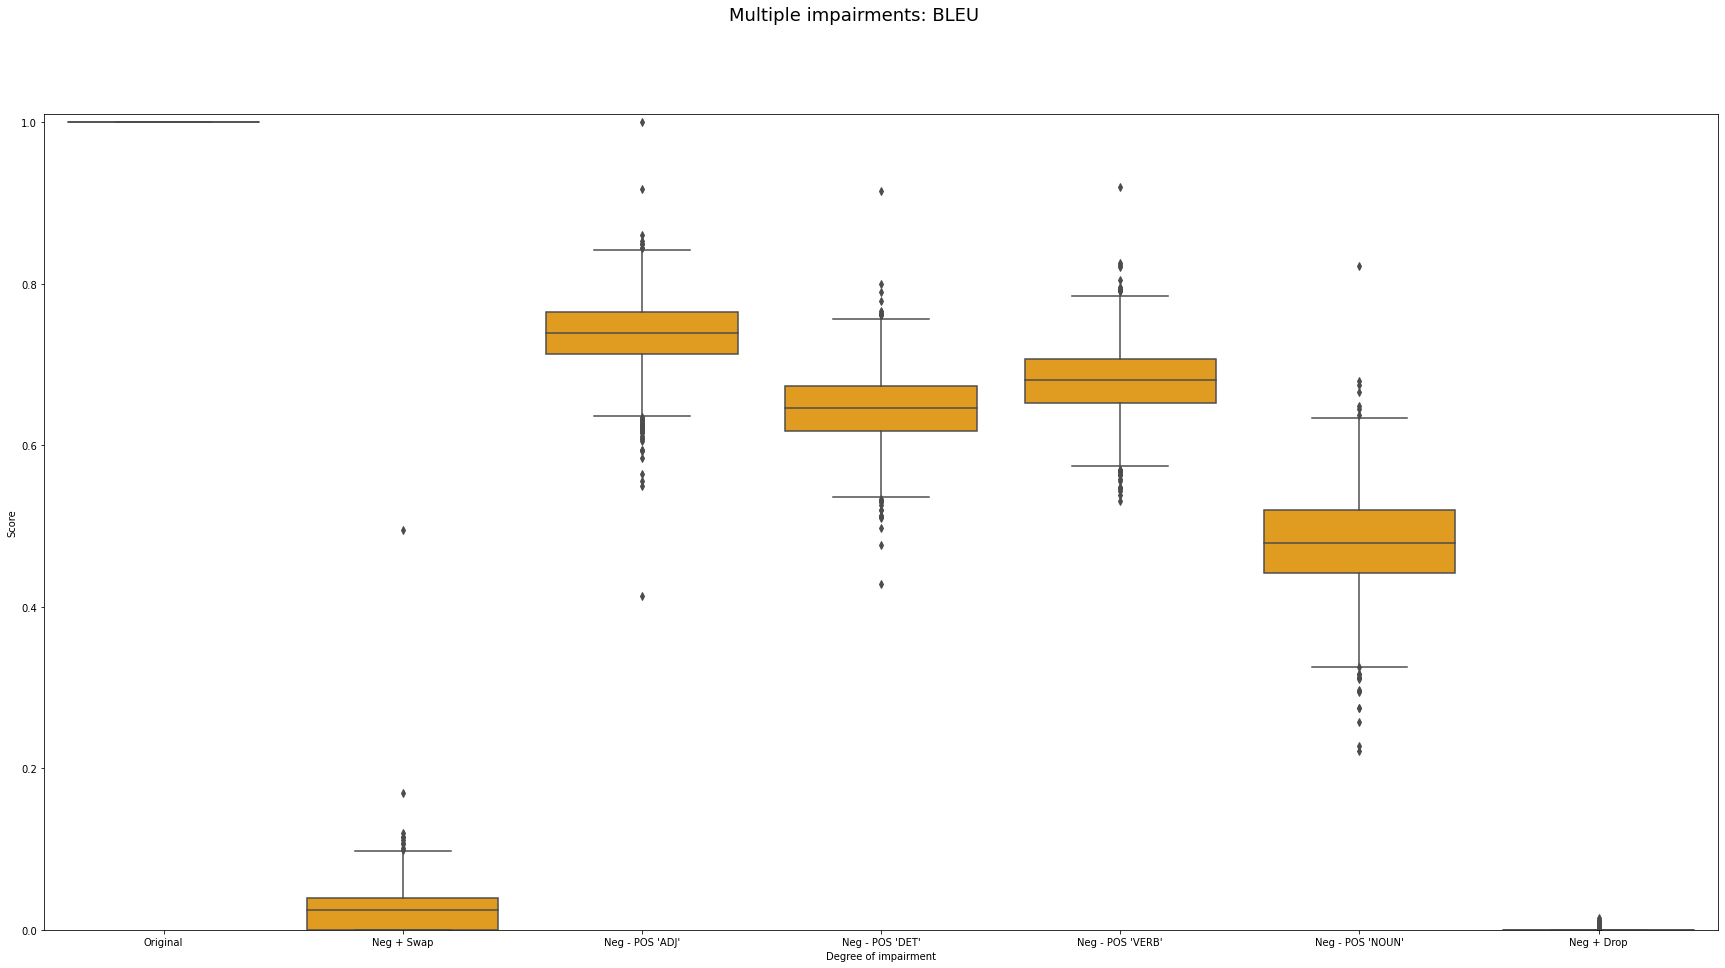

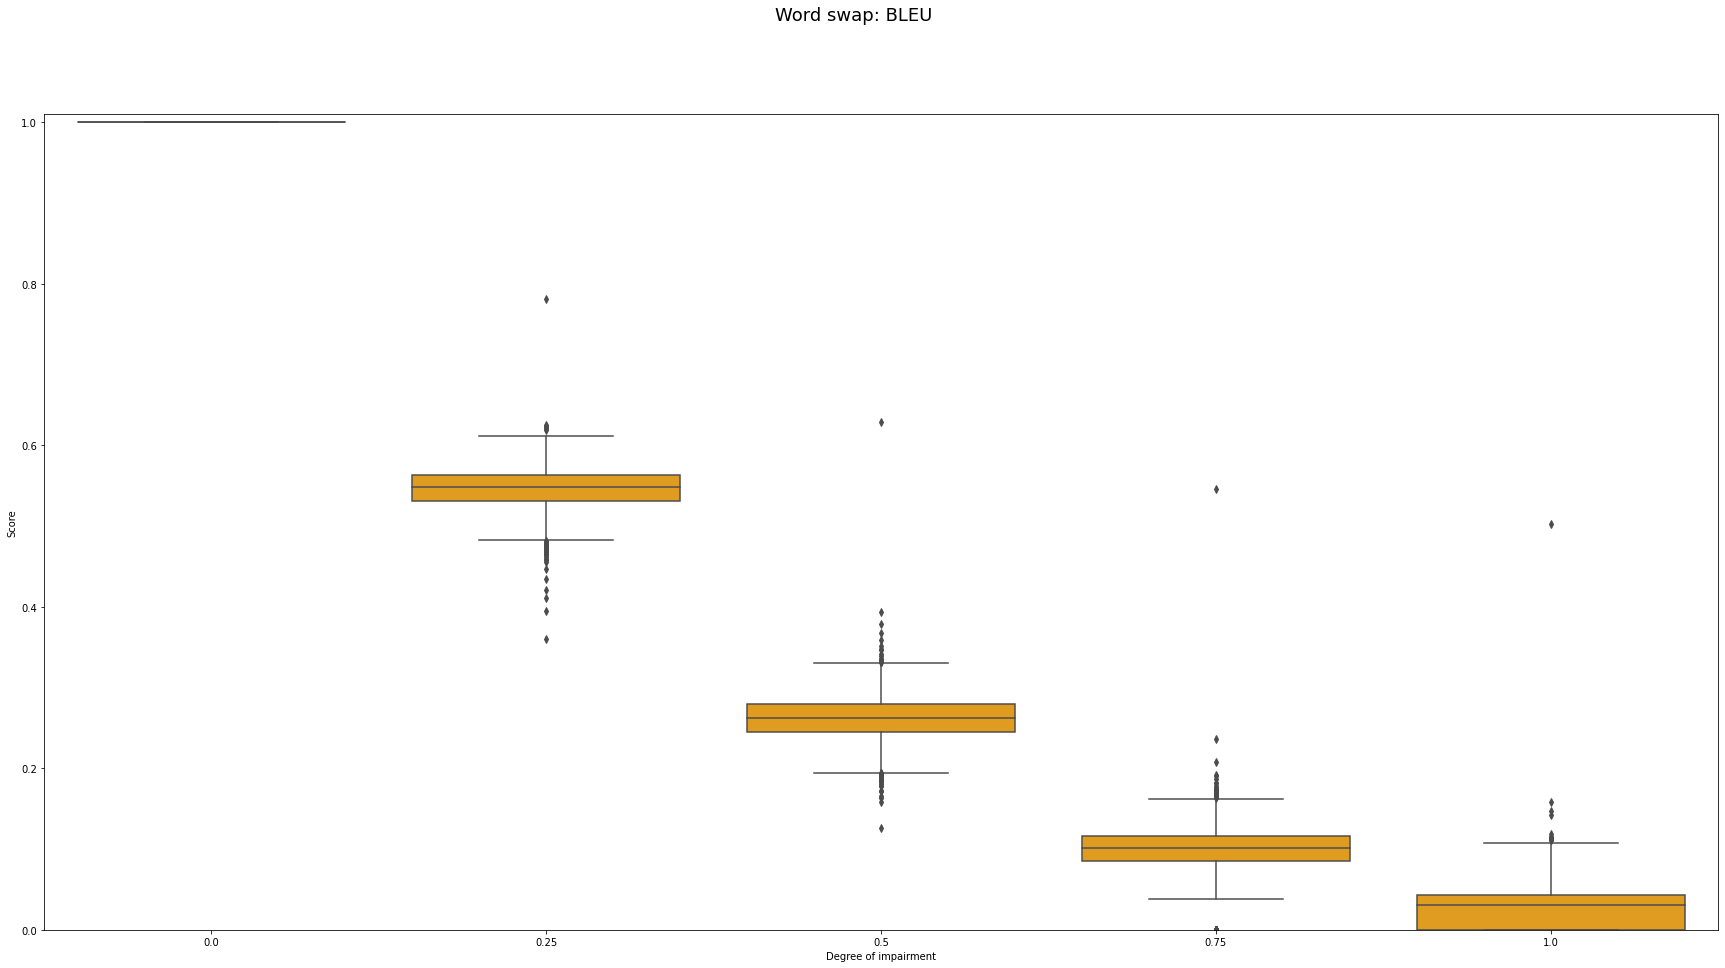

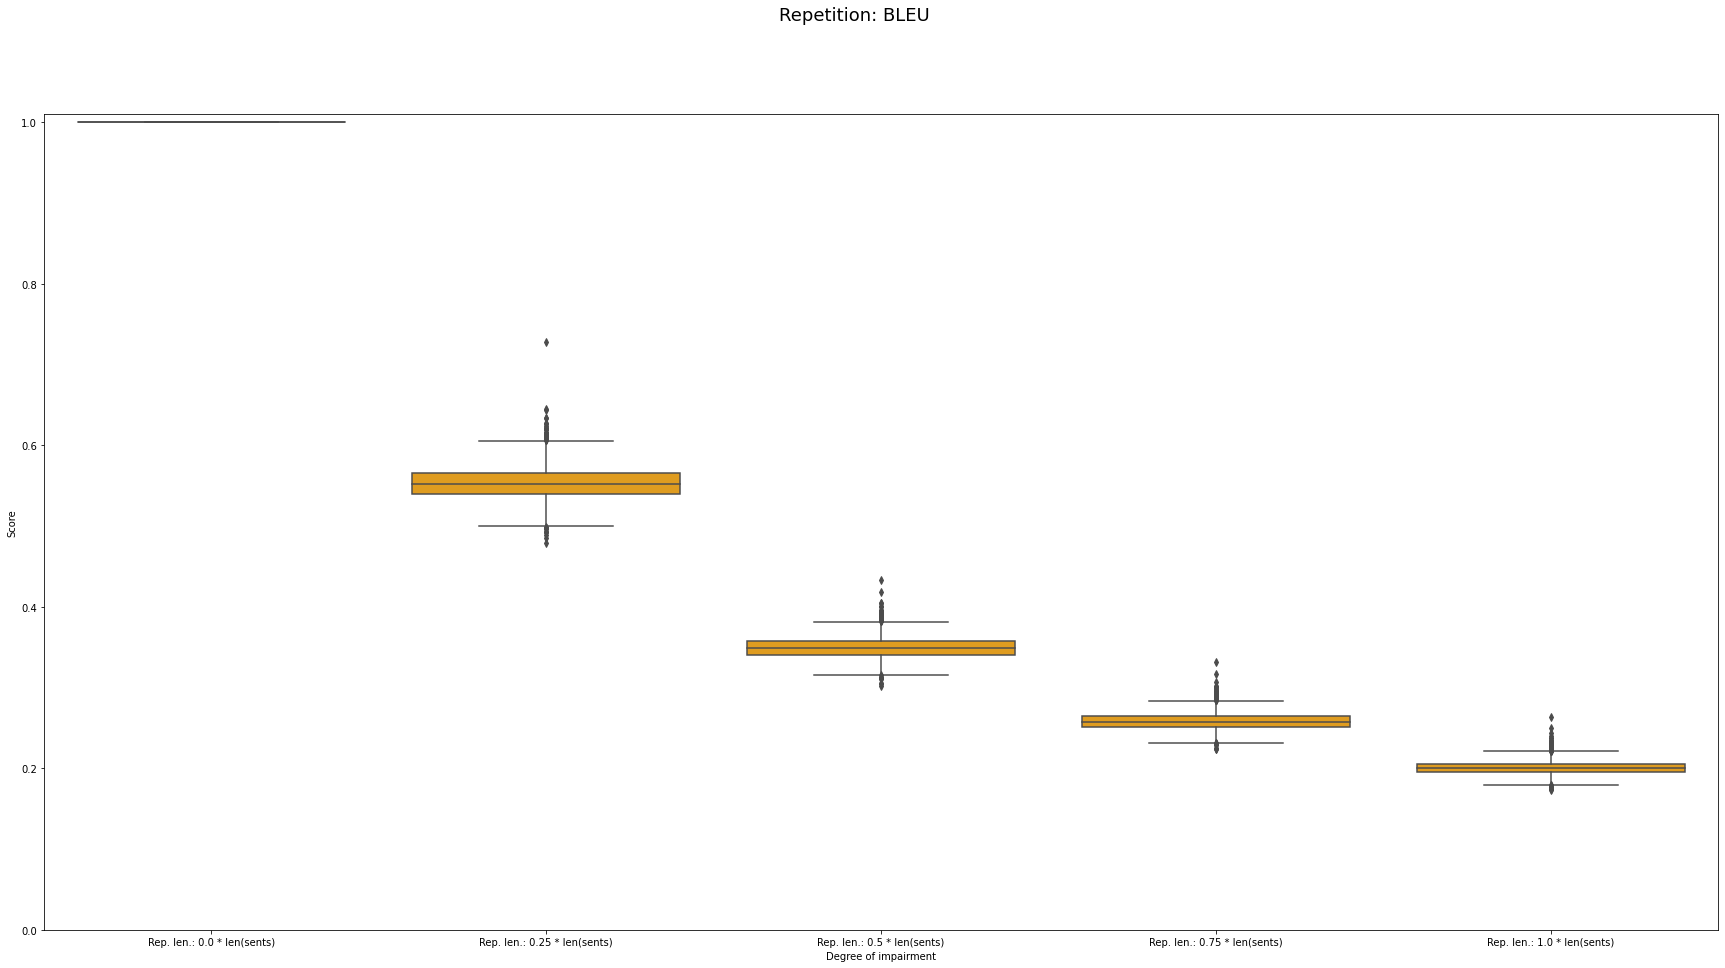

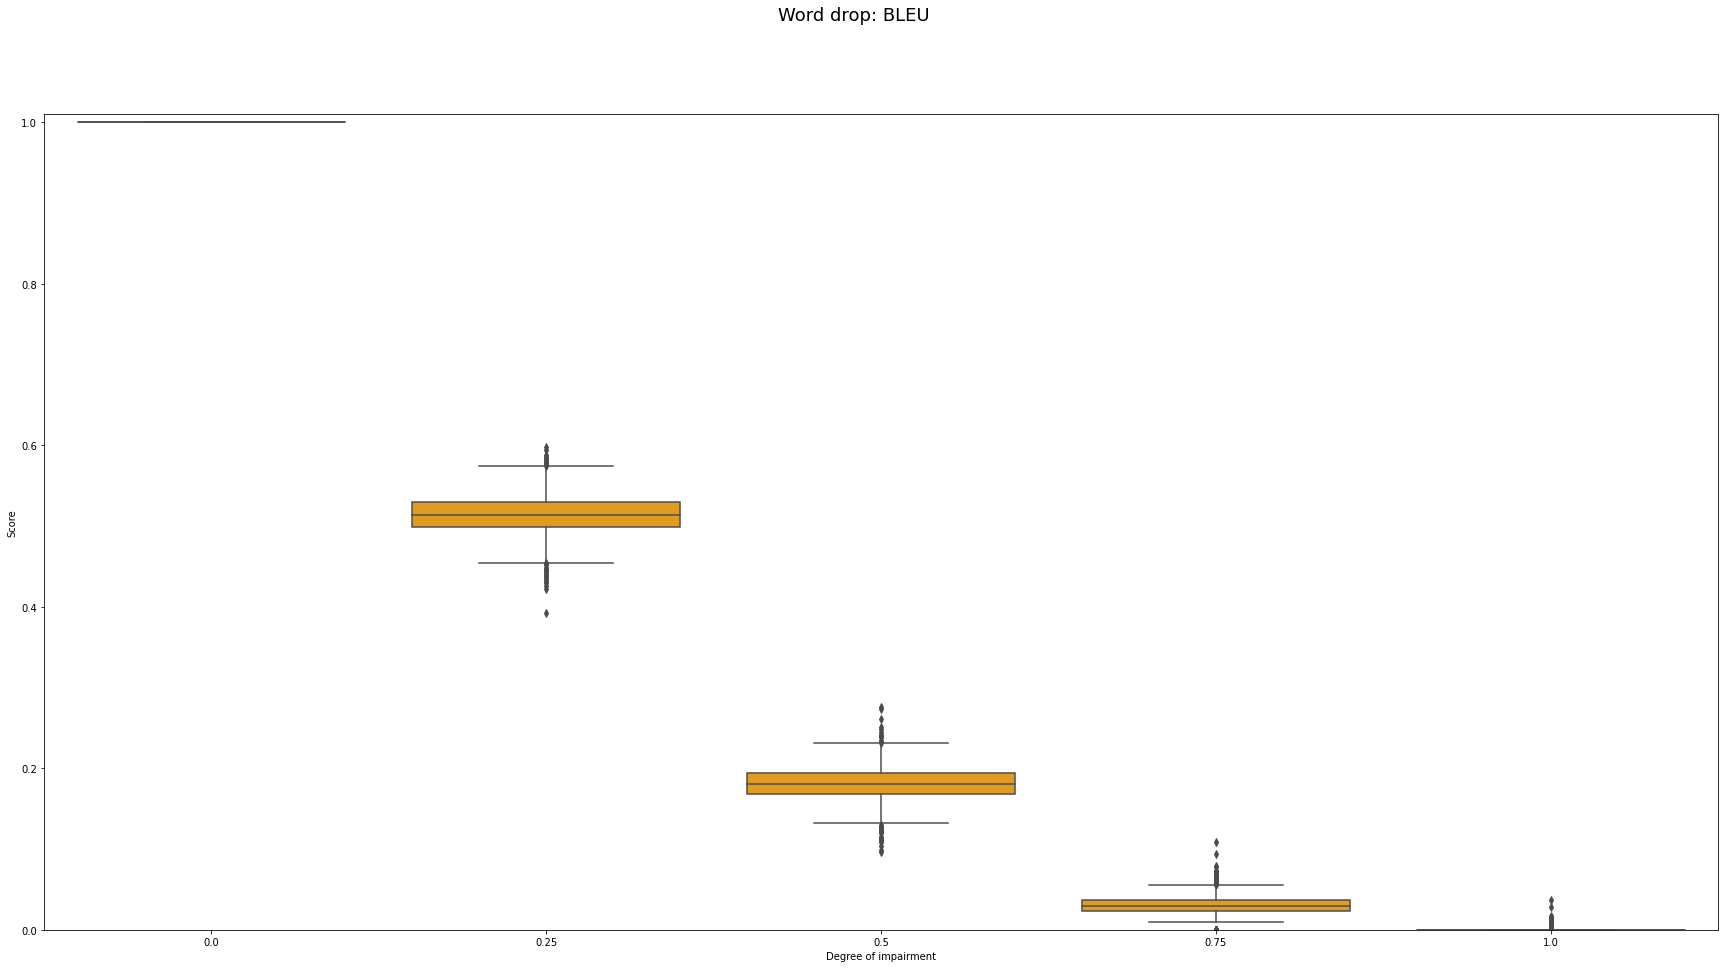

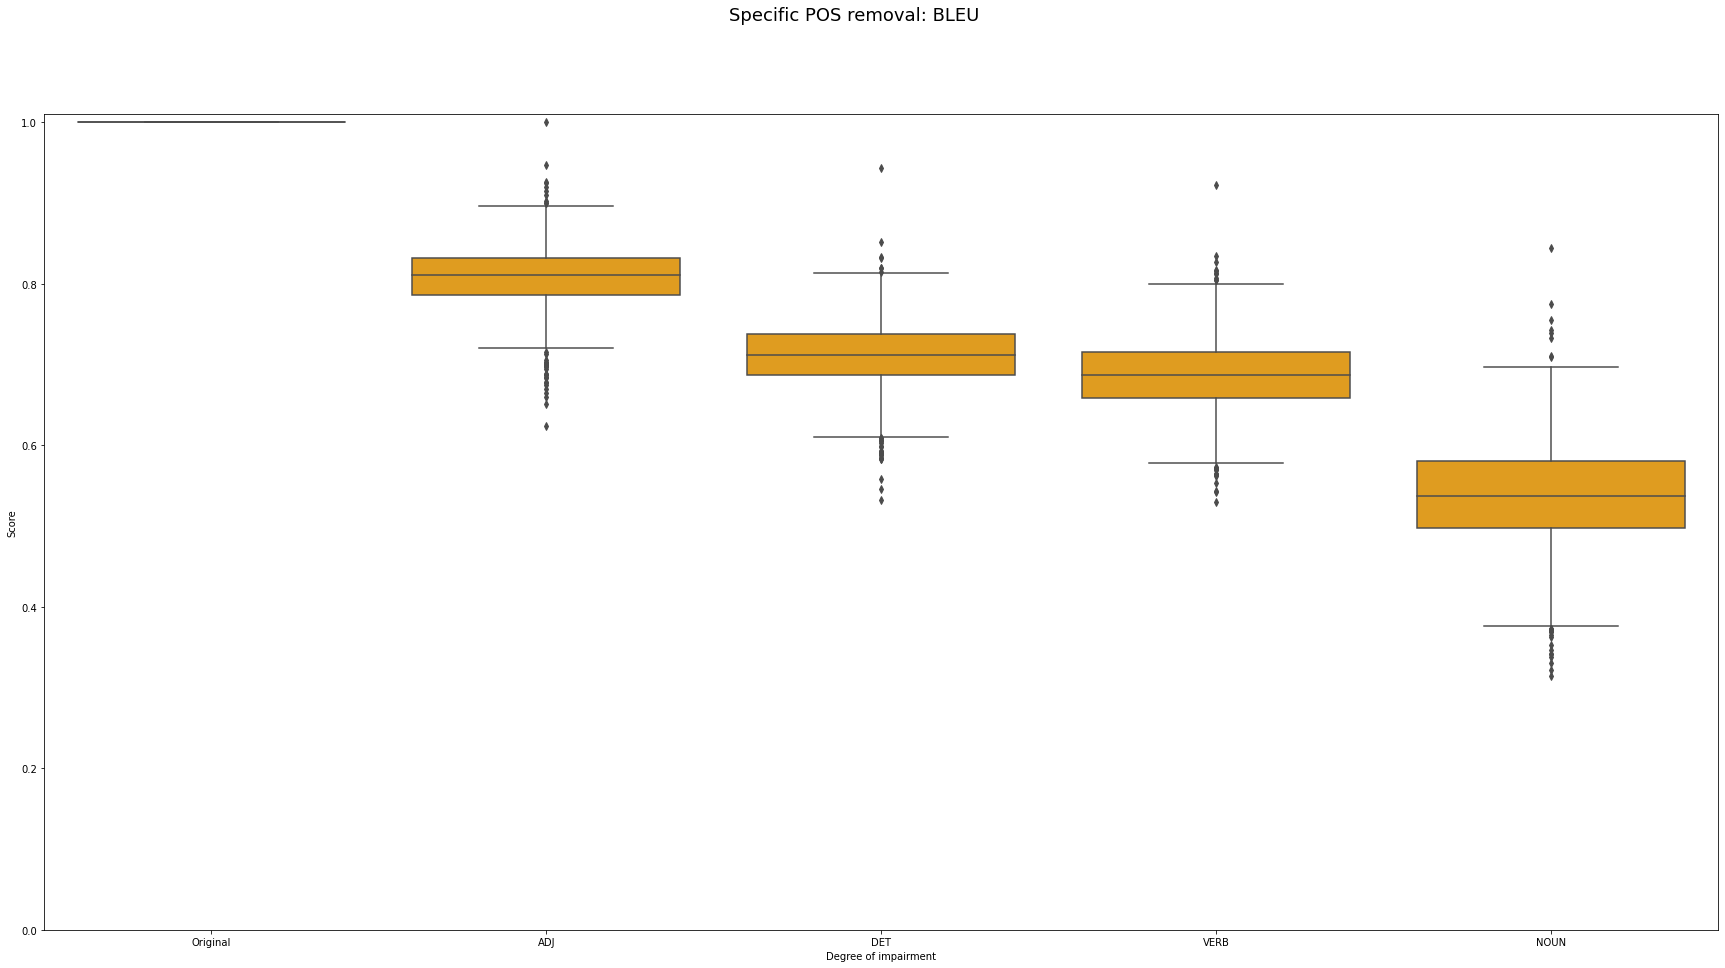

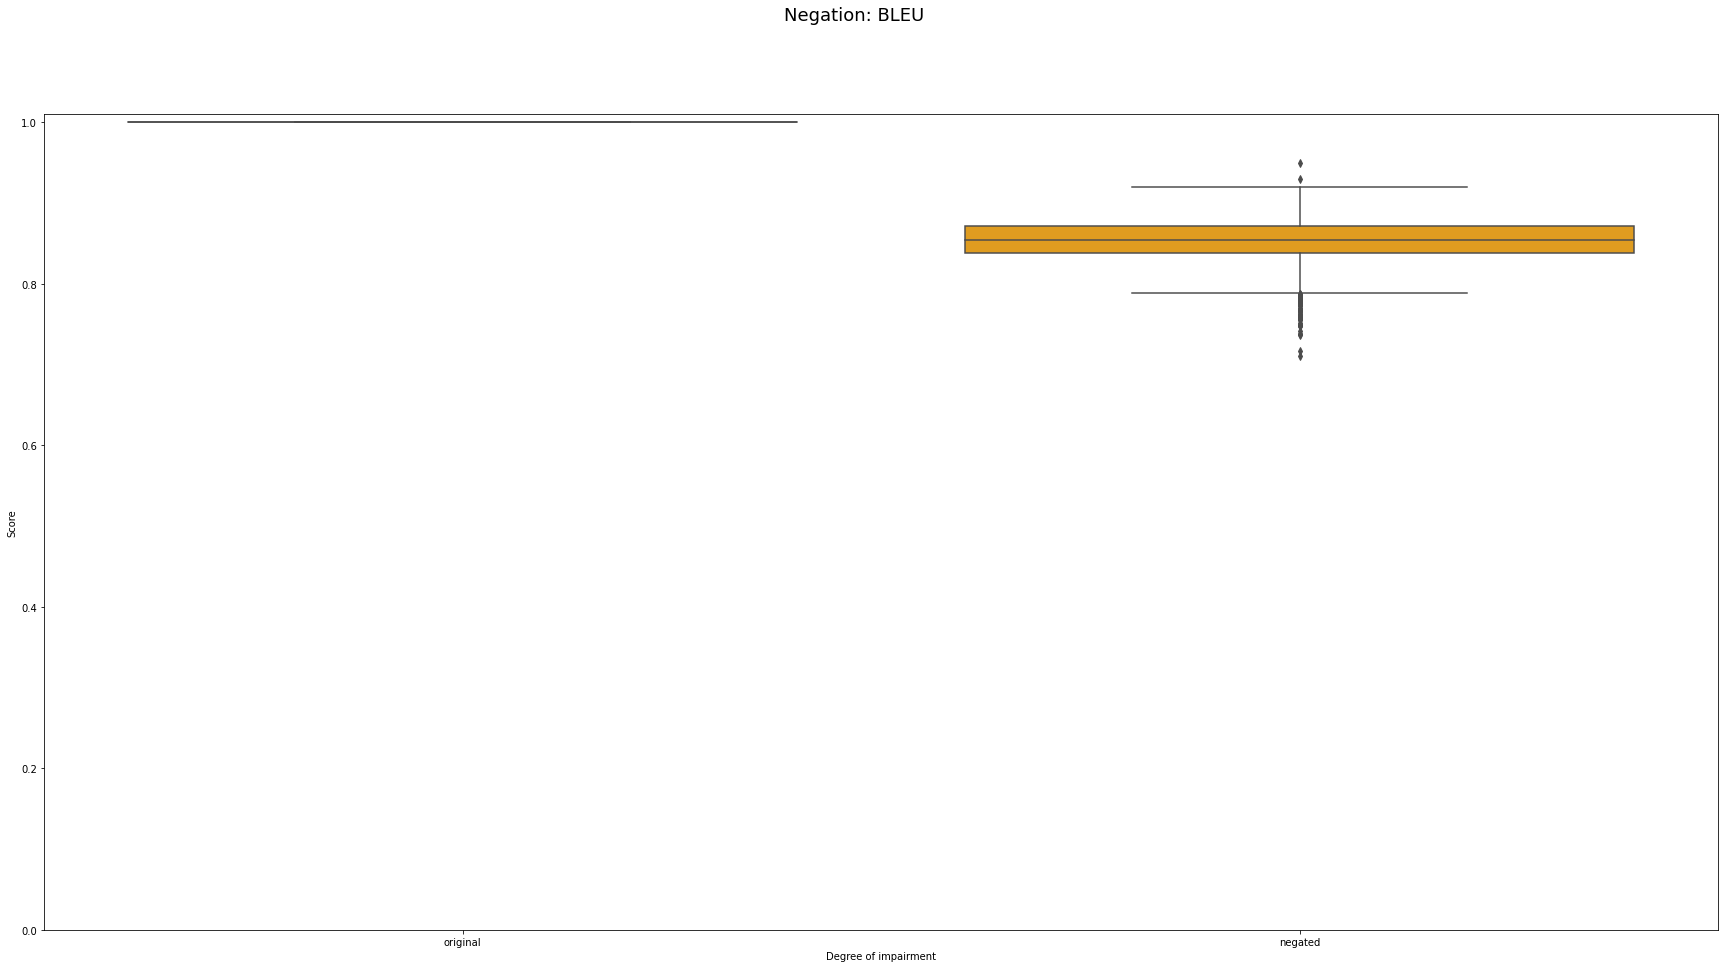

In [164]:
for task, title in toVis:
    _, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 15))

    sns.boxplot(x='degree', y='value', color="orange", data=data[(data['metric']=='BLEU') & (data['task'] == task)], ax=axes)

    axes.set(ylim=(0, 1.01))
    axes.set_ylabel("Score")
    axes.set_xlabel("Degree of impairment", fontsize=10)

    plt.suptitle(title + ": " + "BLEU", fontsize=18)
    plt.savefig(os.path.join(figFolder, "BLEU_" + task + "_fig.pdf"))

# All in one

In [165]:
import numpy as np

array(['Mark-Evaluate (Original, SBERT)', 'BERTScore (idf)',
       'Mark-Evaluate (Original, BERT)', 'BLEURT-Base-128', 'BERTScore',
       'Mark-Evaluate (Theorem based, BERT)',
       'Mark-Evaluate (Theorem based, SBERT)', 'BLEU', 'BLEURT'],
      dtype=object)

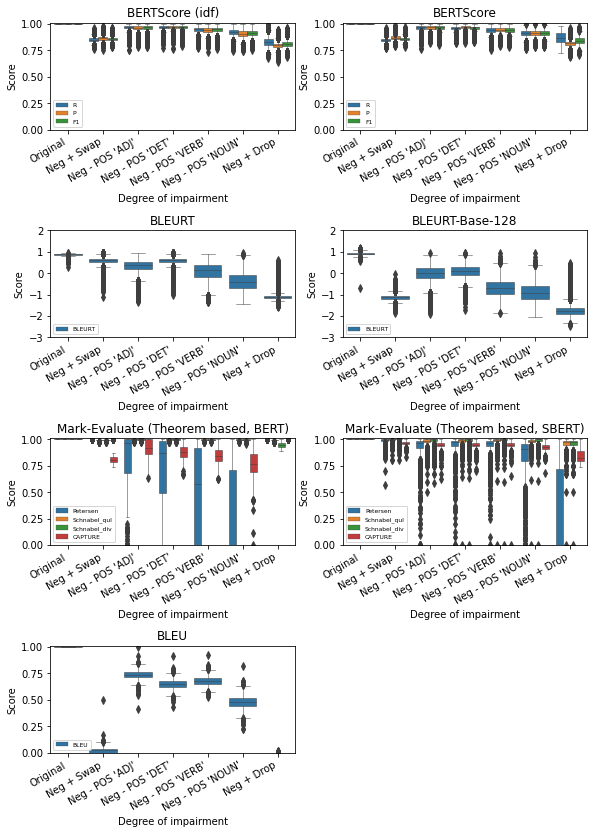

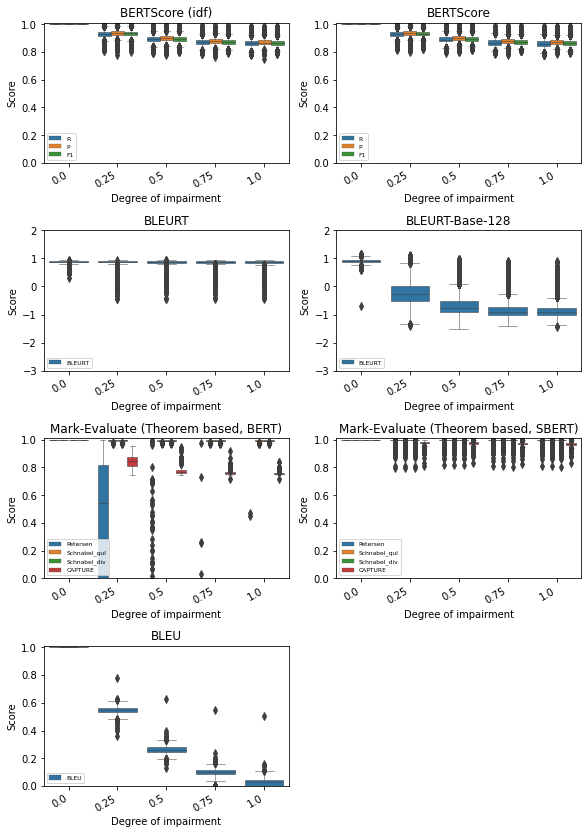

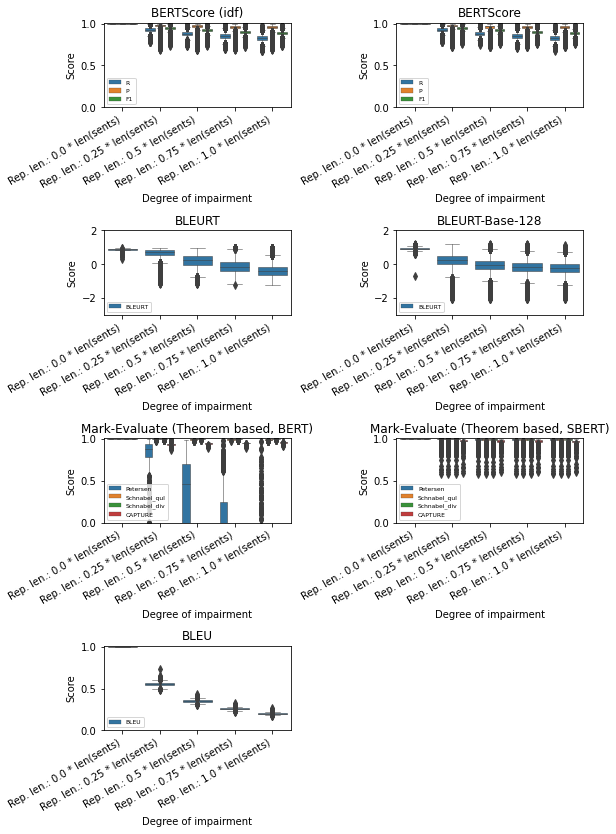

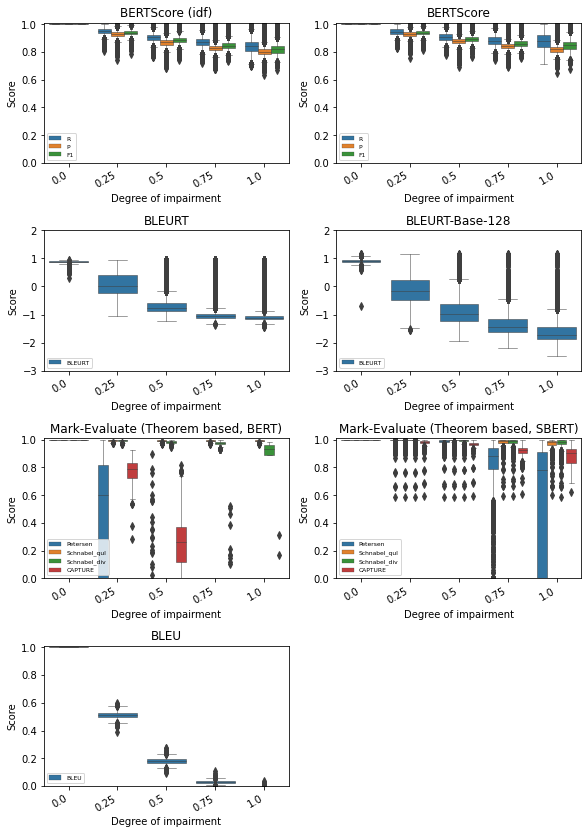

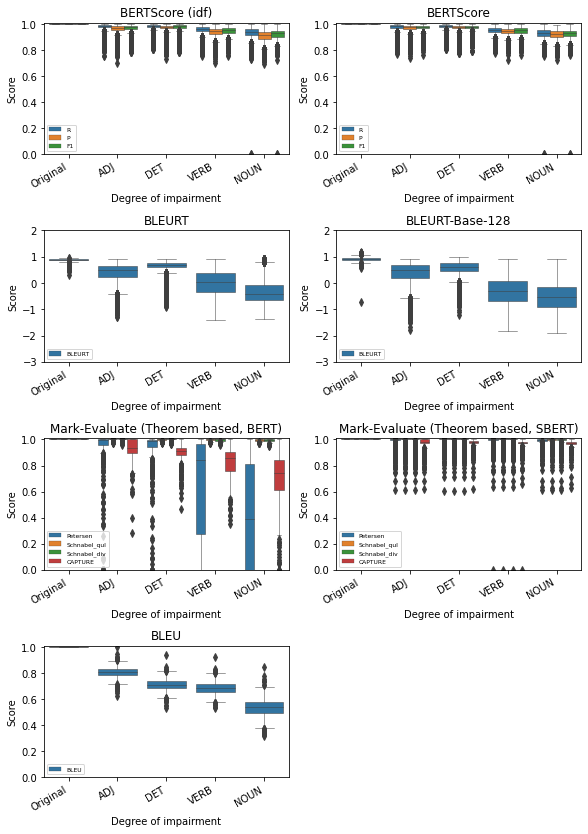

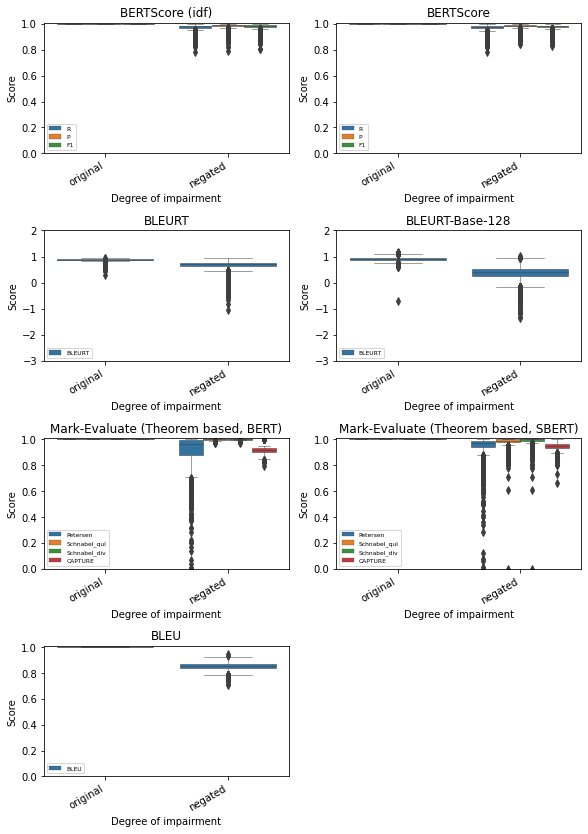

In [195]:
metrics = [
    ['BERTScore (idf)', 'BERTScore'],
    ['BLEURT',  'BLEURT-Base-128'],
    ['Mark-Evaluate (Theorem based, BERT)', 'Mark-Evaluate (Theorem based, SBERT)'],
    ['BLEU']]



for task, title in toVis:

    fig , axes = plt.subplots(nrows=4, ncols=2, figsize=(5, 1.5))#, subplot_kw={'aspect': 1})
    # f.set_size_inches(8.27, 11.69)
    # fig = plt.figure(dpi=300, tight_layout=True)
    fig.set_size_inches(8.27, 11.69, forward=True)

    # ax = np.zeros(7, dtype=object)

    # fig = plt.figure(figsize=(8.27, 11.69))
    # fig.add_subplot(221)   #top left
    # fig.add_subplot(222)   #top right
    # fig.add_subplot(223)   #bottom left
    # fig.add_subplot(224)   
    for i, metric in enumerate(metrics):
        for j, config in enumerate(metric):

            ax = axes[i][j]

            sns.boxplot(x='degree', y='value', hue='submetric', data=data[(data['metric']==config) & (data['task'] == task)], ax=ax, linewidth=0.5)
            
            if config == 'BLEURT' or config == 'BLEURT-Base-128':
                ax.set(ylim=(-3, 2))
            else:
                ax.set(ylim=(0, 1.01))
            ax.set_ylabel("Score")
            ax.set_xlabel("Degree of impairment", fontsize=10)
            ax.title.set_text(config)
            # position lower left (3)
            ax.legend(loc=3, prop={'size': 6})
            plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

    fig.delaxes(axes[3][1])

    plt.tight_layout()  
    plt.savefig(os.path.join(figFolder, "ALL_" + task + "_fig.pdf"))

# Viz Orig ME

In [46]:
me_data: pd.DataFrame = data[((data['metric'] == 'Mark-Evaluate (Original, BERT)') | (data['metric'] == 'Mark-Evaluate (Original, SBERT)')) & (data['submetric'] != 'Petersen')]

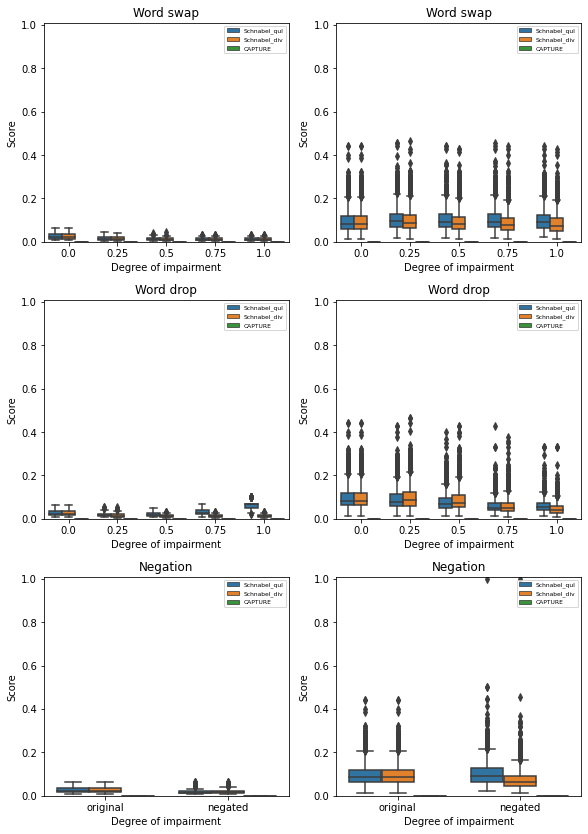

In [47]:
fig , axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 1.5))#, subplot_kw={'aspect': 1})
fig.set_size_inches(8.27, 11.69, forward=True)

versions = ['Mark-Evaluate (Original, BERT)', 'Mark-Evaluate (Original, SBERT)']
i: int = 0
j: int = 0
for _, (task, title) in enumerate(toVis):
    if task == 'mix' or task == 'posdrop' or task == 'repetition':
        continue
    for _, version in enumerate(versions):
        ax = axes[i][j]
        data_tmp: pd.DataFrame = me_data[(me_data['metric']== version) & (me_data['task'] == task)]
        sns.boxplot(x='degree', y='value', hue='submetric', data=data_tmp, ax=ax)

        ax.set(ylim=(0, 1.01))
        ax.set_ylabel("Score")
        ax.set_xlabel("Degree of impairment", fontsize=10)
        ax.title.set_text(title)
        # position upper right
        ax.legend(loc=1, prop={'size': 6})
        
        j +=1
    # reset j
    j = 0
    i += 1

plt.tight_layout()
plt.savefig(os.path.join(figFolder, "ME_orig_I_fig.pdf"))

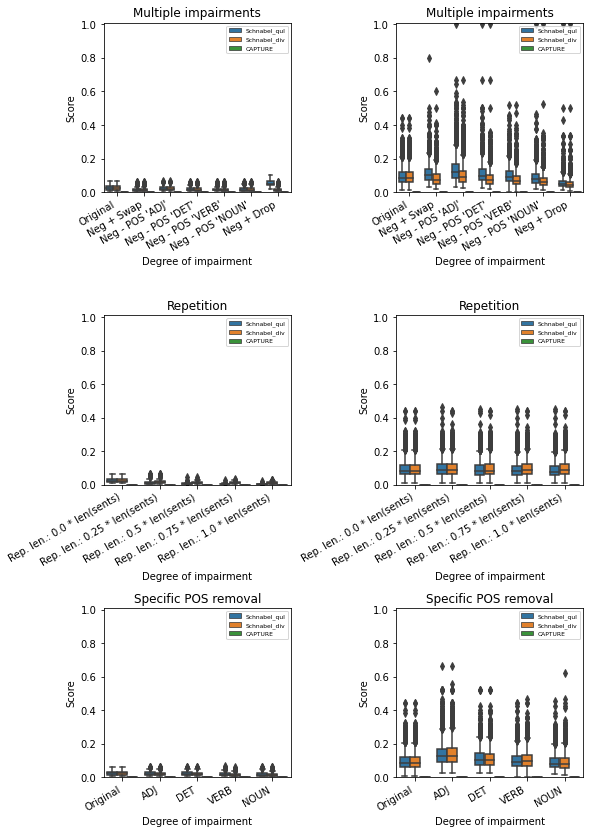

In [48]:
fig , axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 1.5))#, subplot_kw={'aspect': 1})
fig.set_size_inches(8.27, 11.69, forward=True)

versions = ['Mark-Evaluate (Original, BERT)', 'Mark-Evaluate (Original, SBERT)']
i: int = 0
j: int = 0
for _, (task, title) in enumerate(toVis):
    if task != 'mix' and task != 'posdrop' and task != 'repetition':
        continue
    for _, version in enumerate(versions):
        ax = axes[i][j]
        data_tmp: pd.DataFrame = me_data[(me_data['metric']== version) & (me_data['task'] == task)]
        sns.boxplot(x='degree', y='value', hue='submetric', data=data_tmp, ax=ax)

        ax.set(ylim=(0, 1.01))
        ax.set_ylabel("Score")
        ax.set_xlabel("Degree of impairment", fontsize=10)
        ax.title.set_text(title)
        # position upper right
        ax.legend(loc=1, prop={'size': 6})
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        j +=1
    # reset j
    j = 0
    i += 1

plt.tight_layout()
plt.savefig(os.path.join(figFolder, "ME_orig_II_fig.pdf"))

# Viz Drop and Swap


In [88]:
path: str = os.path.join(os.path.join(os.path.dirname("__file__")), "outputs")
folders:list = [f for f in os.listdir(path)]

cols: list = ["metric", "submetric", "value", "task", "result", 'degree_drp', 'degree_swp']
data: pd.DataFrame = pd.DataFrame(columns=cols)

for folder in folders:
    path_tmp: str = os.path.join(path, folder)
    # results: list = [f for f in os.listdir(path_tmp) if re.match(".*_results_data.p", f)]


    df: pd.DataFrame = pd.DataFrame(columns=cols)
    
    # loop
    toVis: list = ['.drop_and_swap_results_data.p']

    for task in toVis:

        f = open(os.path.join(path_tmp, task), 'rb')
        df_tmp = pickle.load(f)
        f.close()

        taskName: re.Match = re.search("^\.(.*)_r", task)
        assert taskName is not None, "Naming convention error. Make sure result files are named '.[TASK]_results_data.p'"
        taskName: str = taskName.group(1)

        df_tmp['task'] = taskName
        
        # append
        df = df.append(df_tmp)
        print(df['metric'].unique())

    df['result'] = folder
    # append
    assert df['metric'].unique()[0] not in data['metric'].unique(), "Metric has already been added to dataframe. Are there only folders with unique metric setups?"
    data = data.append(df)



['Mark-Evaluate (Original, SBERT)']
['BERTScore (idf)']
['Mark-Evaluate (Original, BERT)']
['BLEURT-Base-128']
['BERTScore']
['Mark-Evaluate (Theorem based, BERT)']
['Mark-Evaluate (Theorem based, SBERT)']
['BLEU']
['BLEURT']


In [91]:
data

,metric,submetric,value,task,result,degree_drp,degree_swp
0,"Mark-Evaluate (Original, SBERT)",Petersen,1.000000,drop_and_swap,MEOrgSBERTFinal,0.0,0.0
1,"Mark-Evaluate (Original, SBERT)",Petersen,1.000000,drop_and_swap,MEOrgSBERTFinal,0.0,0.0
2,"Mark-Evaluate (Original, SBERT)",Petersen,1.000000,drop_and_swap,MEOrgSBERTFinal,0.0,0.0
3,"Mark-Evaluate (Original, SBERT)",Petersen,1.000000,drop_and_swap,MEOrgSBERTFinal,0.0,0.0
4,"Mark-Evaluate (Original, SBERT)",Petersen,1.000000,drop_and_swap,MEOrgSBERTFinal,0.0,0.0
...,...,...,...,...,...,...,...
1921979,BLEURT,BLEURT,-1.151094,drop_and_swap,BLEURTTinyFinal,1.0,1.0
1921980,BLEURT,BLEURT,-1.131254,drop_and_swap,BLEURTTinyFinal,1.0,1.0
1921981,BLEURT,BLEURT,-1.048716,drop_and_swap,BLEURTTinyFinal,1.0,1.0
1921982,BLEURT,BLEURT,-1.120583,drop_and_swap,BLEURTTinyFinal,1.0,1.0


In [94]:
data[data['metric'] == 'Mark-Evaluate (Theorem based, BERT)']['submetric'].unique()

array(['Petersen', 'Schnabel_qul', 'Schnabel_div', 'CAPTURE'],
      dtype=object)

# Conjoint impairment

## Mark-Evaluate

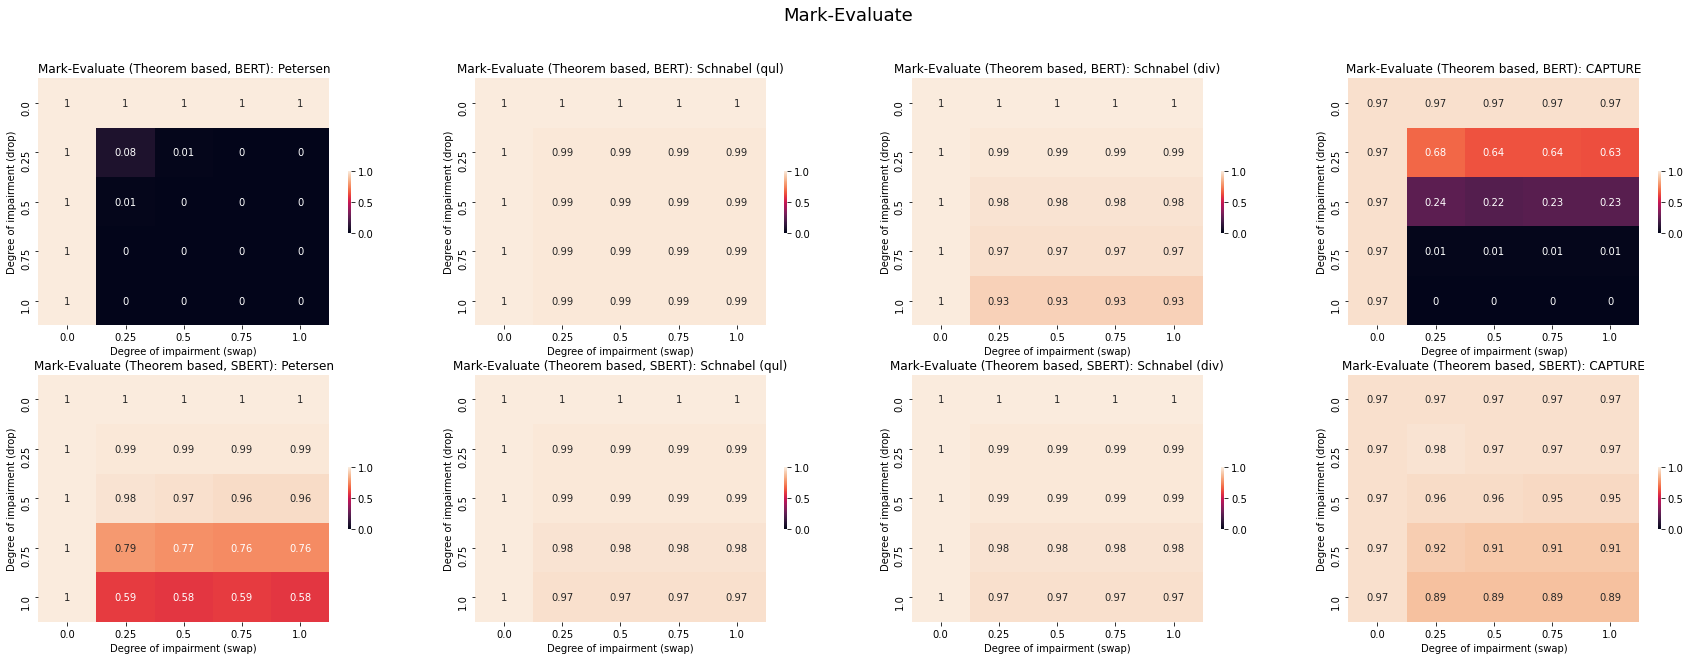

In [157]:
# submetrics: list = data[data['metric'] == 'Mark-Evaluate (Theorem based, BERT)']['submetric'].unique()
meList: list = ['Mark-Evaluate (Theorem based, BERT)', 'Mark-Evaluate (Theorem based, SBERT)']
submetrics: list = [
    ('Petersen', 'Petersen'),
    ('Schnabel_qul', 'Schnabel (qul)'),
    ('Schnabel_div', 'Schnabel (div)'),
    ('CAPTURE', 'CAPTURE')]

_, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), subplot_kw={'aspect': 1})


for i, me in enumerate(meList):
    for j, (submetric, name) in enumerate(submetrics):
        ax = axes[i][j]
        res: pd.DataFrame = data[(data['submetric'] == submetric) & (data['metric'] == me)].groupby(['metric', 'submetric', 'degree_drp', 'degree_swp'], as_index=False)\
            .mean()\
            .pivot(index="degree_drp", columns="degree_swp", values="value")\
            .round(2)

        sns.heatmap(
                    res,
                    annot=True,
                    fmt="g",
                    vmin=0,
                    vmax=1,
                    square=True,
                    cbar_kws={"shrink": 0.25},
                    ax=ax)
        ax.set_aspect('auto')
        ax.title.set_text(me + ": " + name)
        ax.set_ylabel("Degree of impairment (drop)", fontsize=10)
        ax.set_xlabel("Degree of impairment (swap)", fontsize=10)

plt.suptitle("Mark-Evaluate", fontsize=18)
plt.savefig(os.path.join(figFolder, "ME_drop_swap.pdf"))
plt.show()

## BERTScore


In [3]:
data['task'].unique()

array(['mix', 'swapped_words', 'repetition', 'dropped_words', 'posdrop',
       'negation'], dtype=object)

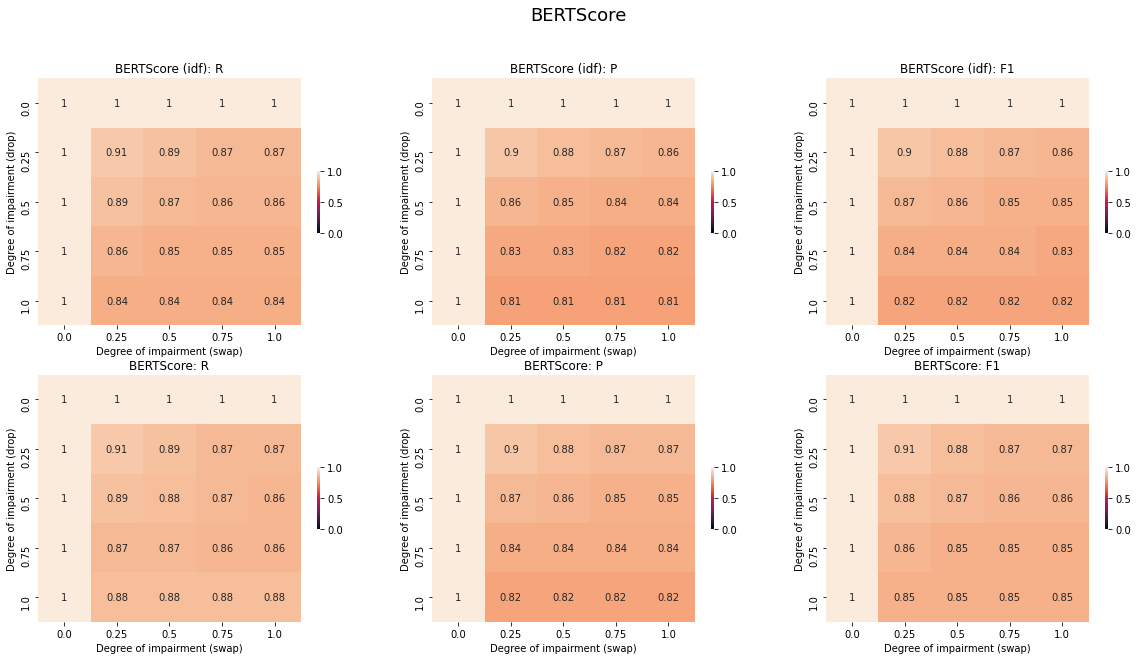

In [155]:
meList: list = ['BERTScore (idf)', 'BERTScore']
submetrics: list = ['R', 'P', 'F1']

_, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), subplot_kw={'aspect': 1})

for i, me in enumerate(meList):
    for j, submetric in enumerate(submetrics):
        ax = axes[i][j]
        res: pd.DataFrame = data[(data['submetric'] == submetric) & (data['metric'] == me)].groupby(['metric', 'submetric', 'degree_drp', 'degree_swp'], as_index=False)\
            .mean()\
            .pivot(index="degree_drp", columns="degree_swp", values="value")\
            .round(2)

        sns.heatmap(
                    res,
                    annot=True,
                    fmt="g",
                    vmin=0,
                    vmax=1,
                    square=True,
                    cbar_kws={"shrink": 0.25},
                    ax=ax)
        ax.set_aspect('auto')
        ax.title.set_text(me + ": " + submetric)
        ax.set_ylabel("Degree of impairment (drop)", fontsize=10)
        ax.set_xlabel("Degree of impairment (swap)", fontsize=10)

plt.suptitle("BERTScore", fontsize=18)
plt.savefig(os.path.join(figFolder, "BERTScore_drop_swap.pdf"))
plt.show()

## BLEURT and BLEU

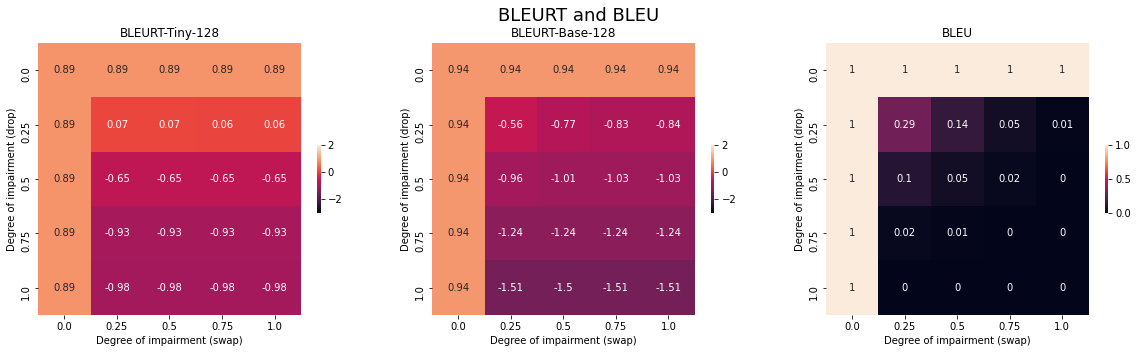

In [156]:
meList: list = [('BLEURT', 'BLEURT-Tiny-128'), ('BLEURT-Base-128', 'BLEURT-Base-128')]
submetrics: list = ['BLEURT']

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), subplot_kw={'aspect': 1}) #(20, 5)

# BLEURT
for i, (me, name) in enumerate(meList):
    ax = axes[i]
    res: pd.DataFrame = data[(data['submetric'] == 'BLEURT') & (data['metric'] == me)].groupby(['metric', 'submetric', 'degree_drp', 'degree_swp'], as_index=False)\
        .mean()\
        .pivot(index="degree_drp", columns="degree_swp", values="value")\
        .round(2)

    sns.heatmap(
        res,
        annot=True,
        fmt="g",
        vmin=-3,
        vmax=2,
        square=True,
        cbar_kws={"shrink": 0.25},
        ax=ax)
    ax.set_aspect('auto')
    ax.title.set_text(name)
    ax.set_ylabel("Degree of impairment (drop)", fontsize=10)
    ax.set_xlabel("Degree of impairment (swap)", fontsize=10)

# BLEU
ax = axes[2]
res: pd.DataFrame = data[(data['submetric'] == 'BLEU') & (data['metric'] == 'BLEU')].groupby(['metric', 'submetric', 'degree_drp', 'degree_swp'], as_index=False)\
    .mean()\
    .pivot(index="degree_drp", columns="degree_swp", values="value")\
    .round(2)

sns.heatmap(
            res,
            annot=True,
            fmt="g",
            vmin=0,
            vmax=1,
            square=True,
            cbar_kws={"shrink": 0.25},
            ax=ax)
ax.set_aspect('auto')
ax.title.set_text('BLEU')
ax.set_ylabel("Degree of impairment (drop)", fontsize=10)
ax.set_xlabel("Degree of impairment (swap)", fontsize=10)

plt.suptitle("BLEURT and BLEU", fontsize=18)
plt.savefig(os.path.join(figFolder, "BLEURTandBLEU_drop_swap.pdf"))
plt.show()

# LaTex Table output

In [5]:
datatmp = data[(data['metric'] != 'Mark-Evaluate (Original, BERT)') & (data['metric'] != 'Mark-Evaluate (Original, SBERT)')]
datatmp = datatmp.drop(['result'], axis=1)

for task, name in toVis:
    texTable = '\\begin{table}\n\t\\tiny\n\t\centering\n\t\caption{' + str(name) + '}'
    texTable += datatmp[datatmp['task'] == task].groupby(['metric', 'submetric', 'degree'], dropna=True).agg(['mean', 'var', 'median']).round(2).to_latex()
    texTable += '\\end{table}'
    with open(task + "_Table.tex", 'w') as f:
        f.write(texTable)